In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt

import re
loan = pd.read_csv('C:/Users/Soumadeep-Chitti/Desktop/DATA SCIENCE/Credit EDA Case Study/application_data.csv')
#loan = pd.read_csv(r'D:\UpGrad\Statistics Assignment\Credit EDA Assingment\application_data.csv')
loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [2]:
loan.shape

(307511, 122)

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
loan.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [5]:
# find the columns with null values.
loan.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [99]:
# Find the percentage of null value columns 
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [6]:
# Create a dataframe to identify the number of columns with more than 30% of null values & decide which one can be dropped.
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
NA_col

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE           

In [7]:
# There are 50 columns with > 30% null values. 
NA_col.count()


50

In [8]:
# Since the count of columns is higher we cannot go by dropping them indivually so we create a funtion to drop columns & rows wherever neccessary. 
# For eg, OWN_CAR_AGE is the Age of client's car which is not important in terms of loan elligbility.

def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df


 

In [9]:
# Drop the columns where 30% null values are present. verify the number of columns dropped and confirm if the values are same from the previous NA_col dataframe & new number of columns.
loan = removeNulls(loan, axis =1,percent = 0.3)


Number of Columns dropped	:  50

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 72)


In [10]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [11]:
# Sum it up to check how many rows have all missing values. Here it is 0
loan.isnull().all(axis=1).sum()

0

In [12]:
loan[loan.isnull().sum(axis=1) > 10]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
394         100457       0    Revolving loans           F            Y   
3066        103581       0    Revolving loans           F            N   
3410        103982       0    Revolving loans           F            N   
3498        104083       0    Revolving loans           M            N   
7077        108240       0    Revolving loans           F            N   
7986        109312       0    Revolving loans           F            N   
10249       111932       0    Revolving loans           F            N   
12087       114098       0    Revolving loans           F            N   
12739       114849       0    Revolving loans           F            N   
14034       116359       0    Revolving loans           M            N   
17133       119985       0    Revolving loans           M            N   
18244       121282       0    Revolving loans           F            N   
20941       124402       0    Revolving loans           M            N   
21579       125134       0    Revolving loans           F            N   
21734       125319       0    Revolving loans           F            N   
24200       128145       1    Revolving loans           M            N   
27190       131601       0    Revolving loans           F            N   
28438       133055       0    Revolving loans           F            N   
28769       133429       0    Revolving loans           F            N   
31014       136002       0    Revolving loans           M            N   
32666       137858       0    Revolving loans           F            N   
33103       138360       0    Revolving loans           M            N   
36899       142738       0    Revolving loans           F            N   
38909       145066       0    Revolving loans           M            N   
39841       146143       0    Revolving loans           F            N   
41051       147539       0    Revolving loans           F            N   
45043       152180       0    Revolving loans           F            N   
45634       152857       0    Revolving loans           F            N   
45999       153299       0    Revolving loans           F            N   
48839       156559       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
260125      401026       0    Revolving loans           F            N   
260963      402009       0    Revolving loans           M            Y   
261487      402680       0    Revolving loans           M            N   
263760      405394       0    Revolving loans           F            N   
265311      407256       0    Revolving loans           F            N   
265842      407954       0    Revolving loans           F            N   
266184      408344       0    Revolving loans           F            N   
266465      408706       0    Revolving loans           M            N   
269492      412312       0    Revolving loans           F            N   
269786      412671       0    Revolving loans           F            N   
271341      414557       0    Revolving loans           F            N   
272215      415598       0    Revolving loans           M            N   
272355      415774       0    Revolving loans           F            N   
273411      416932       0    Revolving loans           F            Y   
276905      420924       0    Revolving loans           F            N   
279200      423439       0    Revolving loans           F            N   
286217      431485       0    Revolving loans           F            N   
288550      434286       0    Revolving loans           M            N   
290495      436548       0    Revolving loans           F            N   
292548      438911       0    Revolving loans           F            Y   
293103      439564       0    Revolving loans           M            N   
298320      445607       1    Revolving loans           M            N   
299727      

In [13]:
# count the number of rows having > 10 missing values
# use len(loan.index)
len(loan[loan.isnull().sum(axis=1) > 10].index)

170

In [14]:
# 170 rows have more than 10 missing values
# calculate the percentage
100*(len(loan[loan.isnull().sum(axis=1) > 10].index) / len(loan.index))

0.05528257525747046

In [15]:
# very few percentage (0.05) of rows are having > 10 missing values. So we can drop those rows.

# retaining the rows having <= 10 NaNs
loan = loan[loan.isnull().sum(axis=1) <= 10]

# look at the summary again
round(100*(loan.isnull().sum()/len(loan.index)), 2)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [79]:
# AMT_GOODS_PRICE is 0.06% of missing values. so we will impute the missing values.
loan['AMT_GOODS_PRICE'].describe().round()


count     307063.0
mean      538381.0
std       369375.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [16]:
# NAME_TYPE_SUITE is 0.42% of missing values. Check the data 
loan['NAME_TYPE_SUITE'].describe()

count            306049
unique                7
top       Unaccompanied
freq             248378
Name: NAME_TYPE_SUITE, dtype: object

Imputing the columns which has null values :

In [17]:
# There are 7 unique values which is frequently used and the value "Unaccompained" is the one which is most frequetly used so we will impute the missing values with "Unaccompained" 
loan.loc[pd.isnull(loan['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = 'Unaccompanied'
round(100*(loan.isnull().sum()/len(loan.index)), 2)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [18]:
# AMT_REQ_CREDIT_BUREAU_HOUR is 13.45% of missing values. so we will impute the missing values.
loan['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [19]:
loan['AMT_REQ_CREDIT_BUREAU_DAY'].describe()


count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [20]:
loan['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()


count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [21]:
#Imputing the mean value to the missing fields for the column AMT_REQ_CREDIT_BUREAU_YEAR
loan['AMT_REQ_CREDIT_BUREAU_WEEK'] = loan['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna((loan['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()))
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [22]:
loan['AMT_REQ_CREDIT_BUREAU_MON'].describe()


count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [23]:
loan['AMT_REQ_CREDIT_BUREAU_QRT'].describe()


count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [24]:
loan['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [25]:
#Imputing the mean value to the missing fields for the column AMT_REQ_CREDIT_BUREAU_YEAR
loan['AMT_REQ_CREDIT_BUREAU_YEAR'] = loan['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna((loan['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()))
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [27]:
#Imputing the mean value to the missing fields for the column OWN_CAR_AGE
loan['OWN_CAR_AGE'] = loan['OWN_CAR_AGE'].fillna((loan['OWN_CAR_AGE'].mean()))
round(100*(loan.isnull().sum()/len(loan.index)), 2)

KeyError: 'OWN_CAR_AGE'

In [28]:
loan['AMT_GOODS_PRICE'].describe()

count    3.070630e+05
mean     5.383813e+05
std      3.693750e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [30]:
#Findling the median for the column AMT_GOODS_PRICE :
col_data = loan['AMT_GOODS_PRICE']
col_median = col_data.median()
col_median

450000.0

In [31]:
#Imputing the median value to the missing fields for the column AMT_GOODS_PRICE :
loan['AMT_GOODS_PRICE'] = loan['AMT_GOODS_PRICE'].fillna((loan['AMT_GOODS_PRICE'].mean()))
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [32]:
loan['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [33]:
#Imputing the mean value to the missing fields for the column DEF_60_CNT_SOCIAL_CIRCLE
loan['DEF_60_CNT_SOCIAL_CIRCLE'] = loan['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((loan['DEF_60_CNT_SOCIAL_CIRCLE'].mean()))
round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# Univariate Analysis :

In [34]:
def univariate(df,col,vartype,hue =None):
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
        
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp

    else:
        exit
        
    plt.show()       

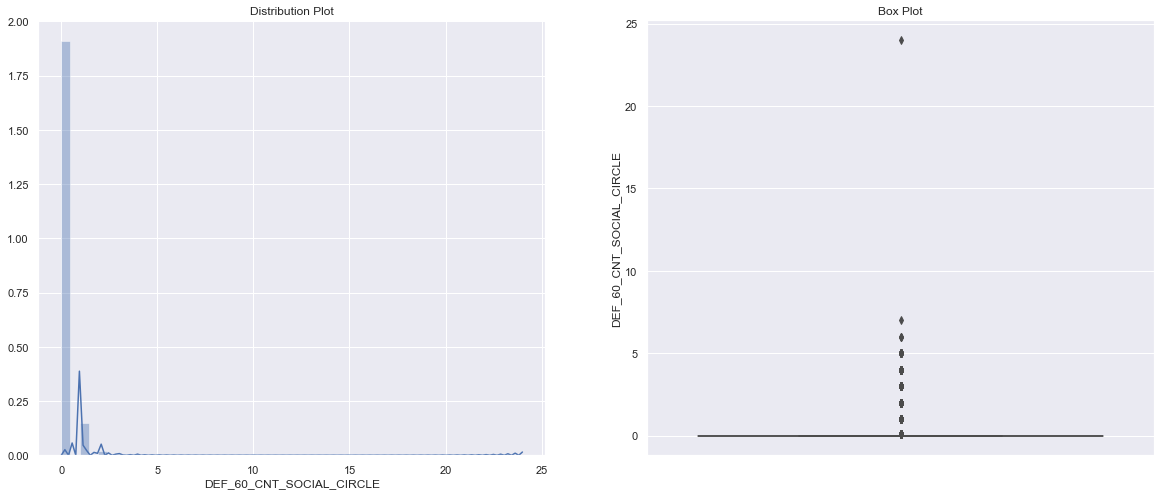

In [35]:
univariate(df=loan,col='DEF_60_CNT_SOCIAL_CIRCLE',vartype=0)

In [36]:
loan['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    307341.000000
mean          0.100049
std           0.361789
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

Max value is 24 which is approx 240 times more than mean value. Thus it is an outlier

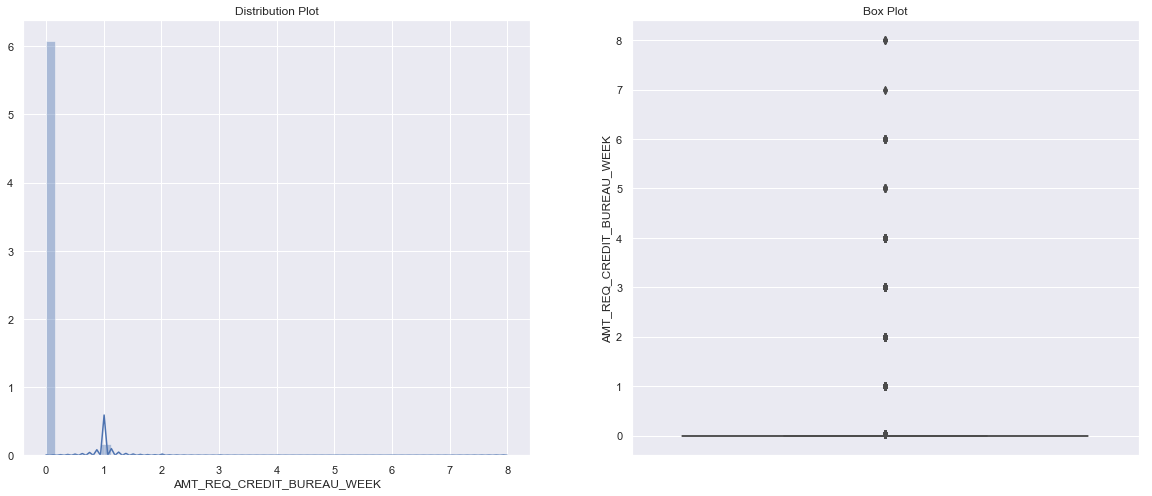

In [37]:
univariate(df=loan,col='AMT_REQ_CREDIT_BUREAU_WEEK',vartype=0)

In [38]:
loan['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    307341.000000
mean          0.034362
std           0.190419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

Max value is 8 which is approx 232 times more than mean value. Thus it is an outlier

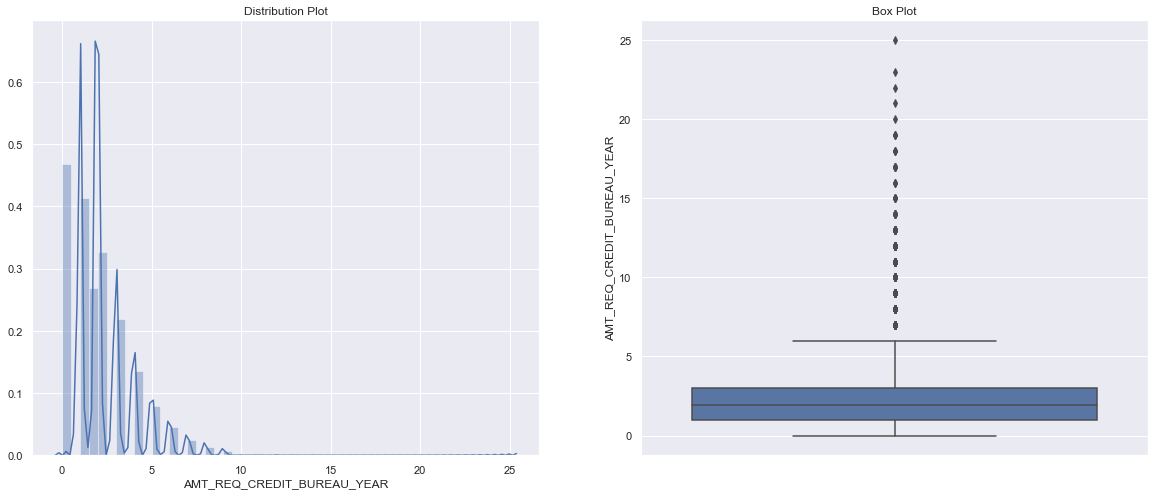

In [39]:
univariate(df=loan,col='AMT_REQ_CREDIT_BUREAU_YEAR',vartype=0)

In [40]:
loan['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    307341.000000
mean          1.899974
std           1.739009
min           0.000000
25%           1.000000
50%           1.899974
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Max value is 25 which is approx 13 times more than mean value. Thus it is an outlier

# Checking for Categorical Variables :

In [41]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307341 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307341 non-null int64
TARGET                         307341 non-null int64
NAME_CONTRACT_TYPE             307341 non-null object
CODE_GENDER                    307341 non-null object
FLAG_OWN_CAR                   307341 non-null object
FLAG_OWN_REALTY                307341 non-null object
CNT_CHILDREN                   307341 non-null int64
AMT_INCOME_TOTAL               307341 non-null float64
AMT_CREDIT                     307341 non-null float64
AMT_ANNUITY                    307329 non-null float64
AMT_GOODS_PRICE                307341 non-null float64
NAME_TYPE_SUITE                307341 non-null object
NAME_INCOME_TYPE               307341 non-null object
NAME_EDUCATION_TYPE            307341 non-null object
NAME_FAMILY_STATUS             307341 non-null object
NAME_HOUSING_TYPE              307341 non-null object
REGION_POPULATION_RELATI

The columns with object dtype are the possible categorical variables.

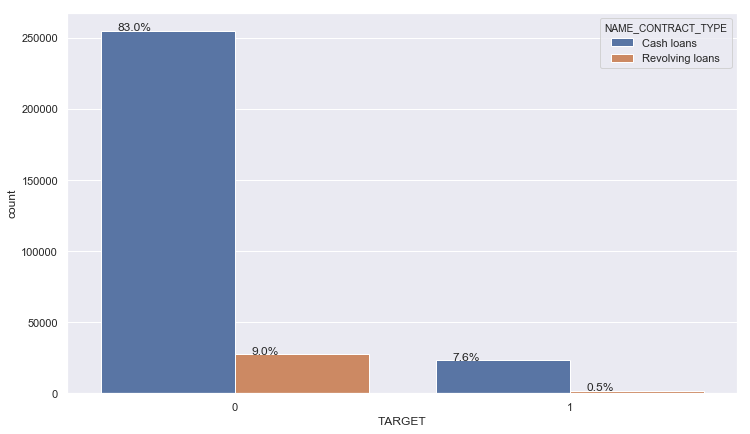

In [42]:
#Univariate analysis on Target and Name_Contract_type :
univariate(df=loan,col='TARGET',vartype=1,hue='NAME_CONTRACT_TYPE')

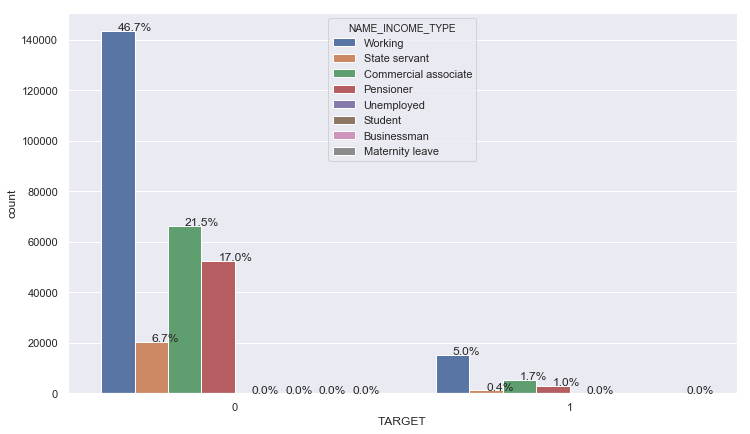

In [43]:
#Univariate analysis on Target and NAME_INCOME_TYPE :
univariate(df=loan,col='TARGET',vartype=1,hue='NAME_INCOME_TYPE')

# Bivariate Analysis

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.

Text(0.5, 1.0, 'Count of Children vs Target Defaulters')

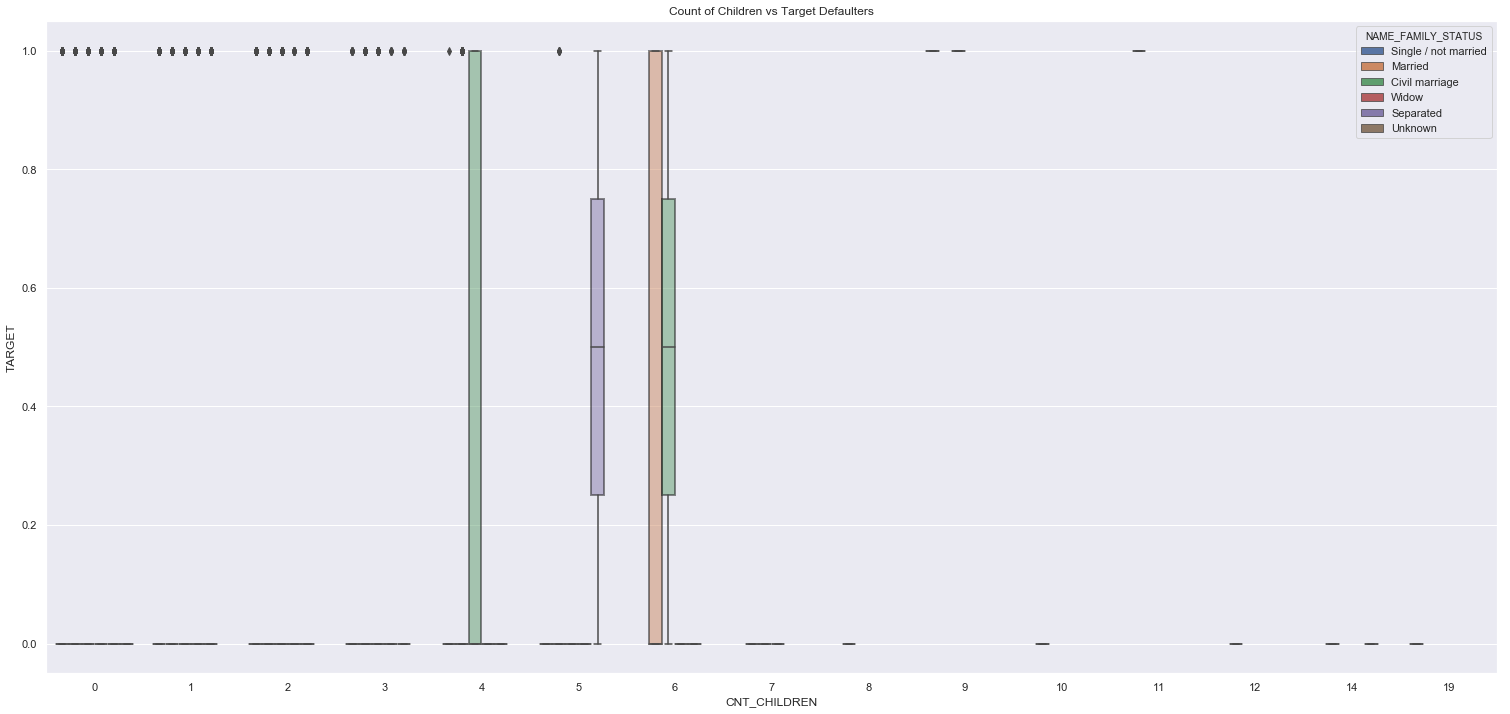

In [44]:
plt.figure(figsize = (26, 12))
ax = sns.boxplot(x='CNT_CHILDREN', y='TARGET', hue="NAME_FAMILY_STATUS", data=loan)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Count of Children vs Target Defaulters')
#plt.xticks(rotation=45),

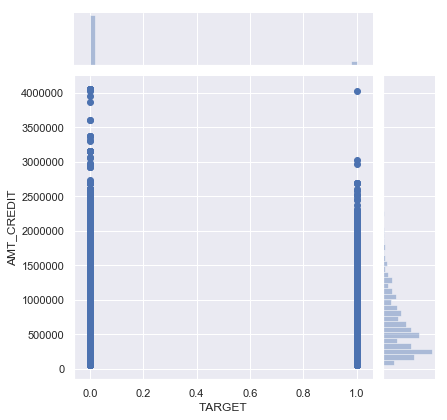

In [45]:
sns.jointplot('TARGET', 'AMT_CREDIT', loan)
plt.show()

In [46]:
loan_correlation = loan.corr()
loan_correlation

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002155     -0.001198   
TARGET                        -0.002155  1.000000      0.019171   
CNT_CHILDREN                  -0.001198  0.019171      1.000000   
AMT_INCOME_TOTAL              -0.001818 -0.003920      0.013014   
AMT_CREDIT                    -0.000336 -0.030321      0.002243   
AMT_ANNUITY                   -0.000419 -0.012724      0.021547   
AMT_GOODS_PRICE               -0.000220 -0.039571     -0.001706   
REGION_POPULATION_RELATIVE     0.000866 -0.037140     -0.025448   
DAYS_BIRTH                    -0.001491  0.078322      0.331043   
DAYS_EMPLOYED                  0.001391 -0.044982     -0.239814   
DAYS_REGISTRATION             -0.000973  0.042042      0.183373   
DAYS_ID_PUBLISH               -0.000285  0.051472     -0.028051   
FLAG_MOBIL                     0.002805  0.000535      0.001042   
FLAG_EMP_PHONE                -0.001361  0.046033      0.240709   
FLAG_WORK_PHONE               -0.000427  0.028497      0.055595   
FLAG_CONT_MOBILE               0.002735  0.000351     -0.000834   
FLAG_PHONE                     0.002695 -0.023814     -0.029935   
FLAG_EMAIL                     0.000243 -0.001751      0.022652   
CNT_FAM_MEMBERS               -0.002980  0.009305      0.879182   
REGION_RATING_CLIENT          -0.001092  0.058839      0.025368   
REGION_RATING_CLIENT_W_CITY   -0.001158  0.060831      0.024730   
HOUR_APPR_PROCESS_START        0.000385 -0.024126     -0.007254   
REG_REGION_NOT_LIVE_REGION    -0.000332  0.005611     -0.013264   
REG_REGION_NOT_WORK_REGION     0.001016  0.006973      0.008149   
LIVE_REGION_NOT_WORK_REGION    0.002835  0.002851      0.014794   
REG_CITY_NOT_LIVE_CITY        -0.001915  0.044424      0.020097   
REG_CITY_NOT_WORK_CITY        -0.001588  0.051010      0.070607   
LIVE_CITY_NOT_WORK_CITY        0.000071  0.032523      0.069907   
EXT_SOURCE_2                   0.002362 -0.160466     -0.017976   
EXT_SOURCE_3                   0.000222 -0.178919     -0.042710   
...                                 ...       ...           ...   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000082  0.032248     -0.001262   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001423  0.009022      0.015232   
DEF_60_CNT_SOCIAL_CIRCLE       0.001186  0.031257     -0.001859   
DAYS_LAST_PHONE_CHANGE        -0.000827  0.055296     -0.005811   
FLAG_DOCUMENT_2                0.000700  0.005418      0.001786   
FLAG_DOCUMENT_3               -0.003473  0.044283      0.056744   
FLAG_DOCUMENT_4               -0.004140 -0.002673     -0.003711   
FLAG_DOCUMENT_5               -0.001064 -0.000316     -0.016776   
FLAG_DOCUMENT_6                0.002114 -0.028629     -0.157090   
FLAG_DOCUMENT_7               -0.002695 -0.001521     -0.001499   
FLAG_DOCUMENT_8                0.001802 -0.008062      0.051679   
FLAG_DOCUMENT_9                0.001504 -0.004357     -0.002004   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002757   
FLAG_DOCUMENT_11              -0.002014 -0.004234     -0.005325   
FLAG_DOCUMENT_12              -0.001046 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000895 -0.011589      0.003940   
FLAG_DOCUMENT_14              -0.001079 -0.009469     -0.005466   
FLAG_DOCUMENT_15               0.002604 -0.006539      0.003606   
FLAG_DOCUMENT_16              -0.000727 -0.011624      0.010655   
FLAG_DOCUMENT_17               0.001450 -0.003379      0.000771   
FLAG_DOCUMENT_18               0.000507 -0.007960      0.004022   
FLAG_DOCUMENT_19               0.000167 -0.001359      0.000862   
FLAG_DOCUMENT_20               0.001072  0.000214      0.000986   
FLAG_DOCUMENT_21               0.000254  0.003779     -0.002361   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002672  0.000930     -0.000410   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001953  0.000718     -0.002277   
AMT_REQ_CREDIT_BUREAU_MON      0.000485 -0.012462     -0.010808   
AMT_REQ_C

In [47]:
loan["AMT_INCOME_TOTAL"].describe().round()

count       307341.0
mean        168753.0
std         237132.0
min          25650.0
25%         112500.0
50%         146700.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [48]:
# Bin the Total annual income 
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['AMT_INCOME_TOTAL'], bins, labels=slot)


In [49]:
loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                   0.000000                        0.0   
1                   0.000000                        0.0   
2                   0.000000                        0.0   
3                   0.034362                        NaN   
4                   0.000000                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  annual_inc_range  
0                        0.0                    1.000000  100000 and above  
1                        0.0                    0.000000  100000 and above  
2                        0.0                    0.000000       50000-75000  
3                        NaN                    1.899974  100000 and above  
4                        0.0                    0.000000  100000 and above  

[5 rows x 73 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF050E46D8>]],
      dtype=object)

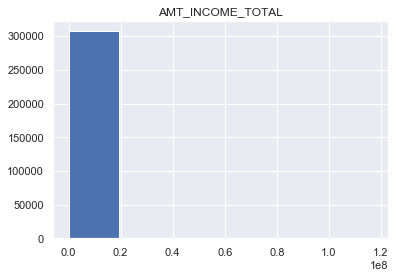

In [50]:
#Plotting the Histogram :
loan.hist(column='AMT_INCOME_TOTAL',bins=6)

In [51]:
loan["AMT_CREDIT"].describe().round()

count     307341.0
mean      599045.0
std       402443.0
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64

In [52]:
# Bin the Total loan amount approved to the customer  
bins = [45000, 100000,500000,1000000,2000000,3000000,4000000,4500000]
slot = ['45000-100000', '100000-500000', '500000-1000000', '1000000-2000000','2000000-3000000','3000000-4000000','4000000 and above']
loan['Loan_amt_range'] = pd.cut(loan['AMT_CREDIT'], bins, labels=slot)


In [53]:
loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                 0                0                        0.0   
1  ...                 0                0                        0.0   
2  ...                 0                0                        0.0   
3  ...                 0                0                        NaN   
4  ...                 0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                   0.000000   
1                       0.0                   0.000000   
2                       0.0                   0.000000   
3                       NaN                   0.034362   
4                       0.0                   0.000000   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  annual_inc_range   Loan_amt_range  
0                    1.000000  100000 and above    100000-500000  
1                    0.000000  100000 and above  1000000-2000000  
2                    0.000000       50000-75000    100000-500000  
3                    1.899974  100000 and above    100000-500000  
4                    0.000000  100000 and above   500000-1000000  

[5 rows x 74 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF05178FD0>]],
      dtype=object)

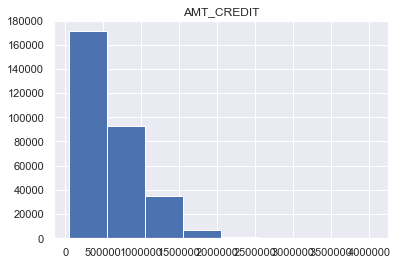

In [54]:
#Plotting the Histogram :
loan.hist(column='AMT_CREDIT',bins=8)

# Correlation for Numerical Columns :

In [55]:
type(loan_correlation)

pandas.core.frame.DataFrame

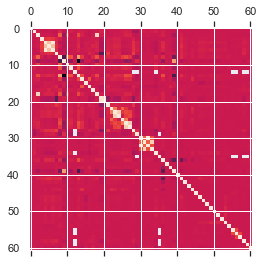

In [56]:
plt.matshow(loan.corr())
plt.show()

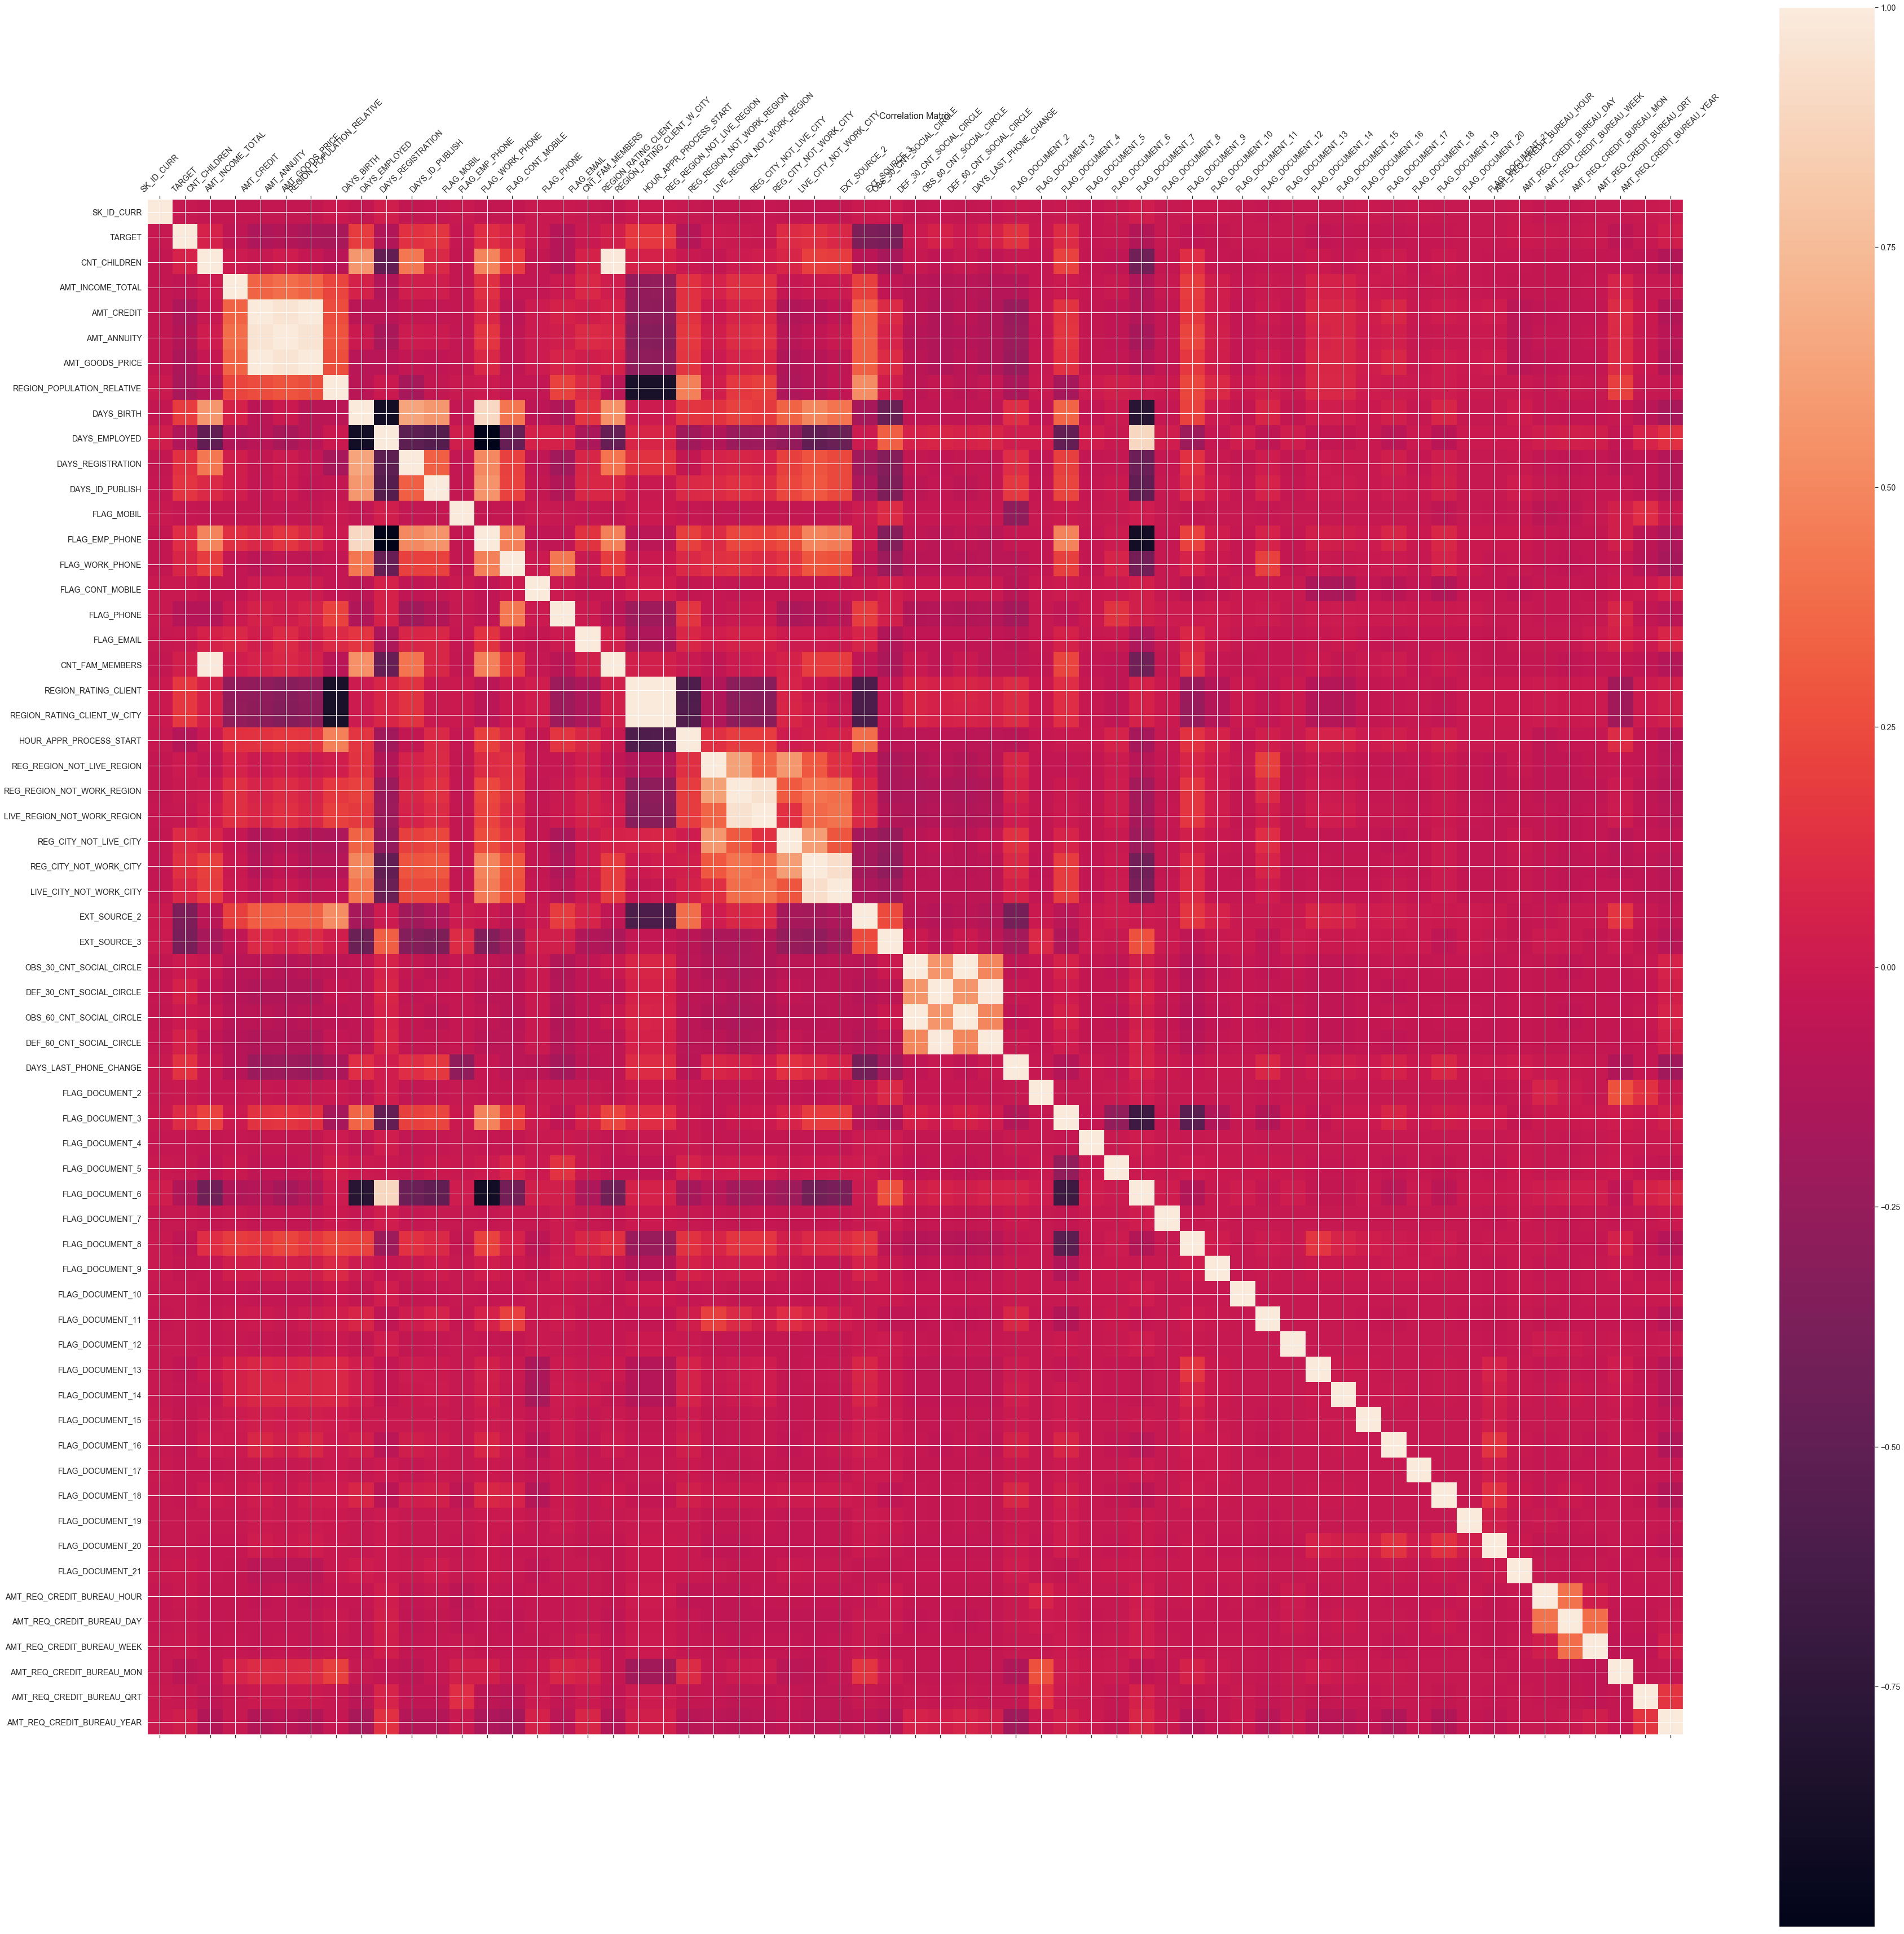

In [57]:
f = plt.figure(figsize=(61, 61))
plt.matshow(loan_correlation.corr(), fignum=f.number)
plt.xticks(range(loan_correlation.shape[1]), loan_correlation.columns, fontsize=14, rotation=45)
plt.yticks(range(loan_correlation.shape[1]), loan_correlation.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Since the above Heat Map contains all the numerical columns, let's select only 23 numerical columns that are relevant :

In [58]:
loan_new = loan[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].copy()
loan_new

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0            1             0        202500.000    406597.5      24700.5   
1            0             0        270000.000   1293502.5      35698.5   
2            0             0         67500.000    135000.0       6750.0   
3            0             0        135000.000    312682.5      29686.5   
4            0             0        121500.000    513000.0      21865.5   
5            0             0         99000.000    490495.5      27517.5   
6            0             1        171000.000   1560726.0      41301.0   
7            0             0        360000.000   1530000.0      42075.0   
8            0             0        112500.000   1019610.0      33826.5   
9            0             0        135000.000    405000.0      20250.0   
10           0             1        112500.000    652500.0      21177.0   
11           0             0         38419.155    148365.0      10678.5   
12           0             0         67500.000     80865.0       5881.5   
13           0             1        225000.000    918468.0      28966.5   
14           0             0        189000.000    773680.5      32778.0   
15           0             0        157500.000    299772.0      20160.0   
16           0             0        108000.000    509602.5      26149.5   
17           0             1         81000.000    270000.0      13500.0   
18           0             0        112500.000    157500.0       7875.0   
19           0             1         90000.000    544491.0      17563.5   
20           0             0        135000.000    427500.0      21375.0   
21           0             1        202500.000   1132573.5      37561.5   
22           0             1        450000.000    497520.0      32521.5   
23           0             0         83250.000    239850.0      23850.0   
24           0             2        135000.000    247500.0      12703.5   
25           0             0         90000.000    225000.0      11074.5   
26           1             0        112500.000    979992.0      27076.5   
27           0             1        112500.000    327024.0      23827.5   
28           0             0        270000.000    790830.0      57676.5   
29           0             0         90000.000    180000.0       9000.0   
...        ...           ...               ...         ...          ...   
307481       1             0        225000.000    297000.0      19975.5   
307482       0             0        225000.000    500566.5      34969.5   
307483       0             0         99000.000    247275.0      16479.0   
307484       0             0        540000.000    545040.0      35617.5   
307485       0             1        270000.000    180000.0       9000.0   
307486       0             1        292500.000    355536.0      18283.5   
307487       0             0        117000.000   1071909.0      31473.0   
307488       0             0        157500.000    135000.0      13351.5   
307489       1             0        225000.000    521280.0      23089.5   
307490       0             0         81000.000    135000.0       9148.5   
307491       0             2         90000.000   1078200.0      31522.5   
307492       0             0        585000.000   1575000.0      43443.0   
307493       0             0        135000.000    946764.0      37678.5   
307494       0             1        270000.000    479700.0      46858.5   
307495       0             0        180000.000    808650.0      23773.5   
307496       0             0        360000.000    337500.0      16875.0   
307497       0             0        180000.000    270126.0      12028.5   
307498       0             0        198000.000   1312110.0      52168.5   
307499       0             0         81000.000    225000.0      12694.5   
307500       0             0        261000.000   1303812.0      35982.0   
307501       0             3         81000.000    269550.0      11871.0   
307502       0             1     

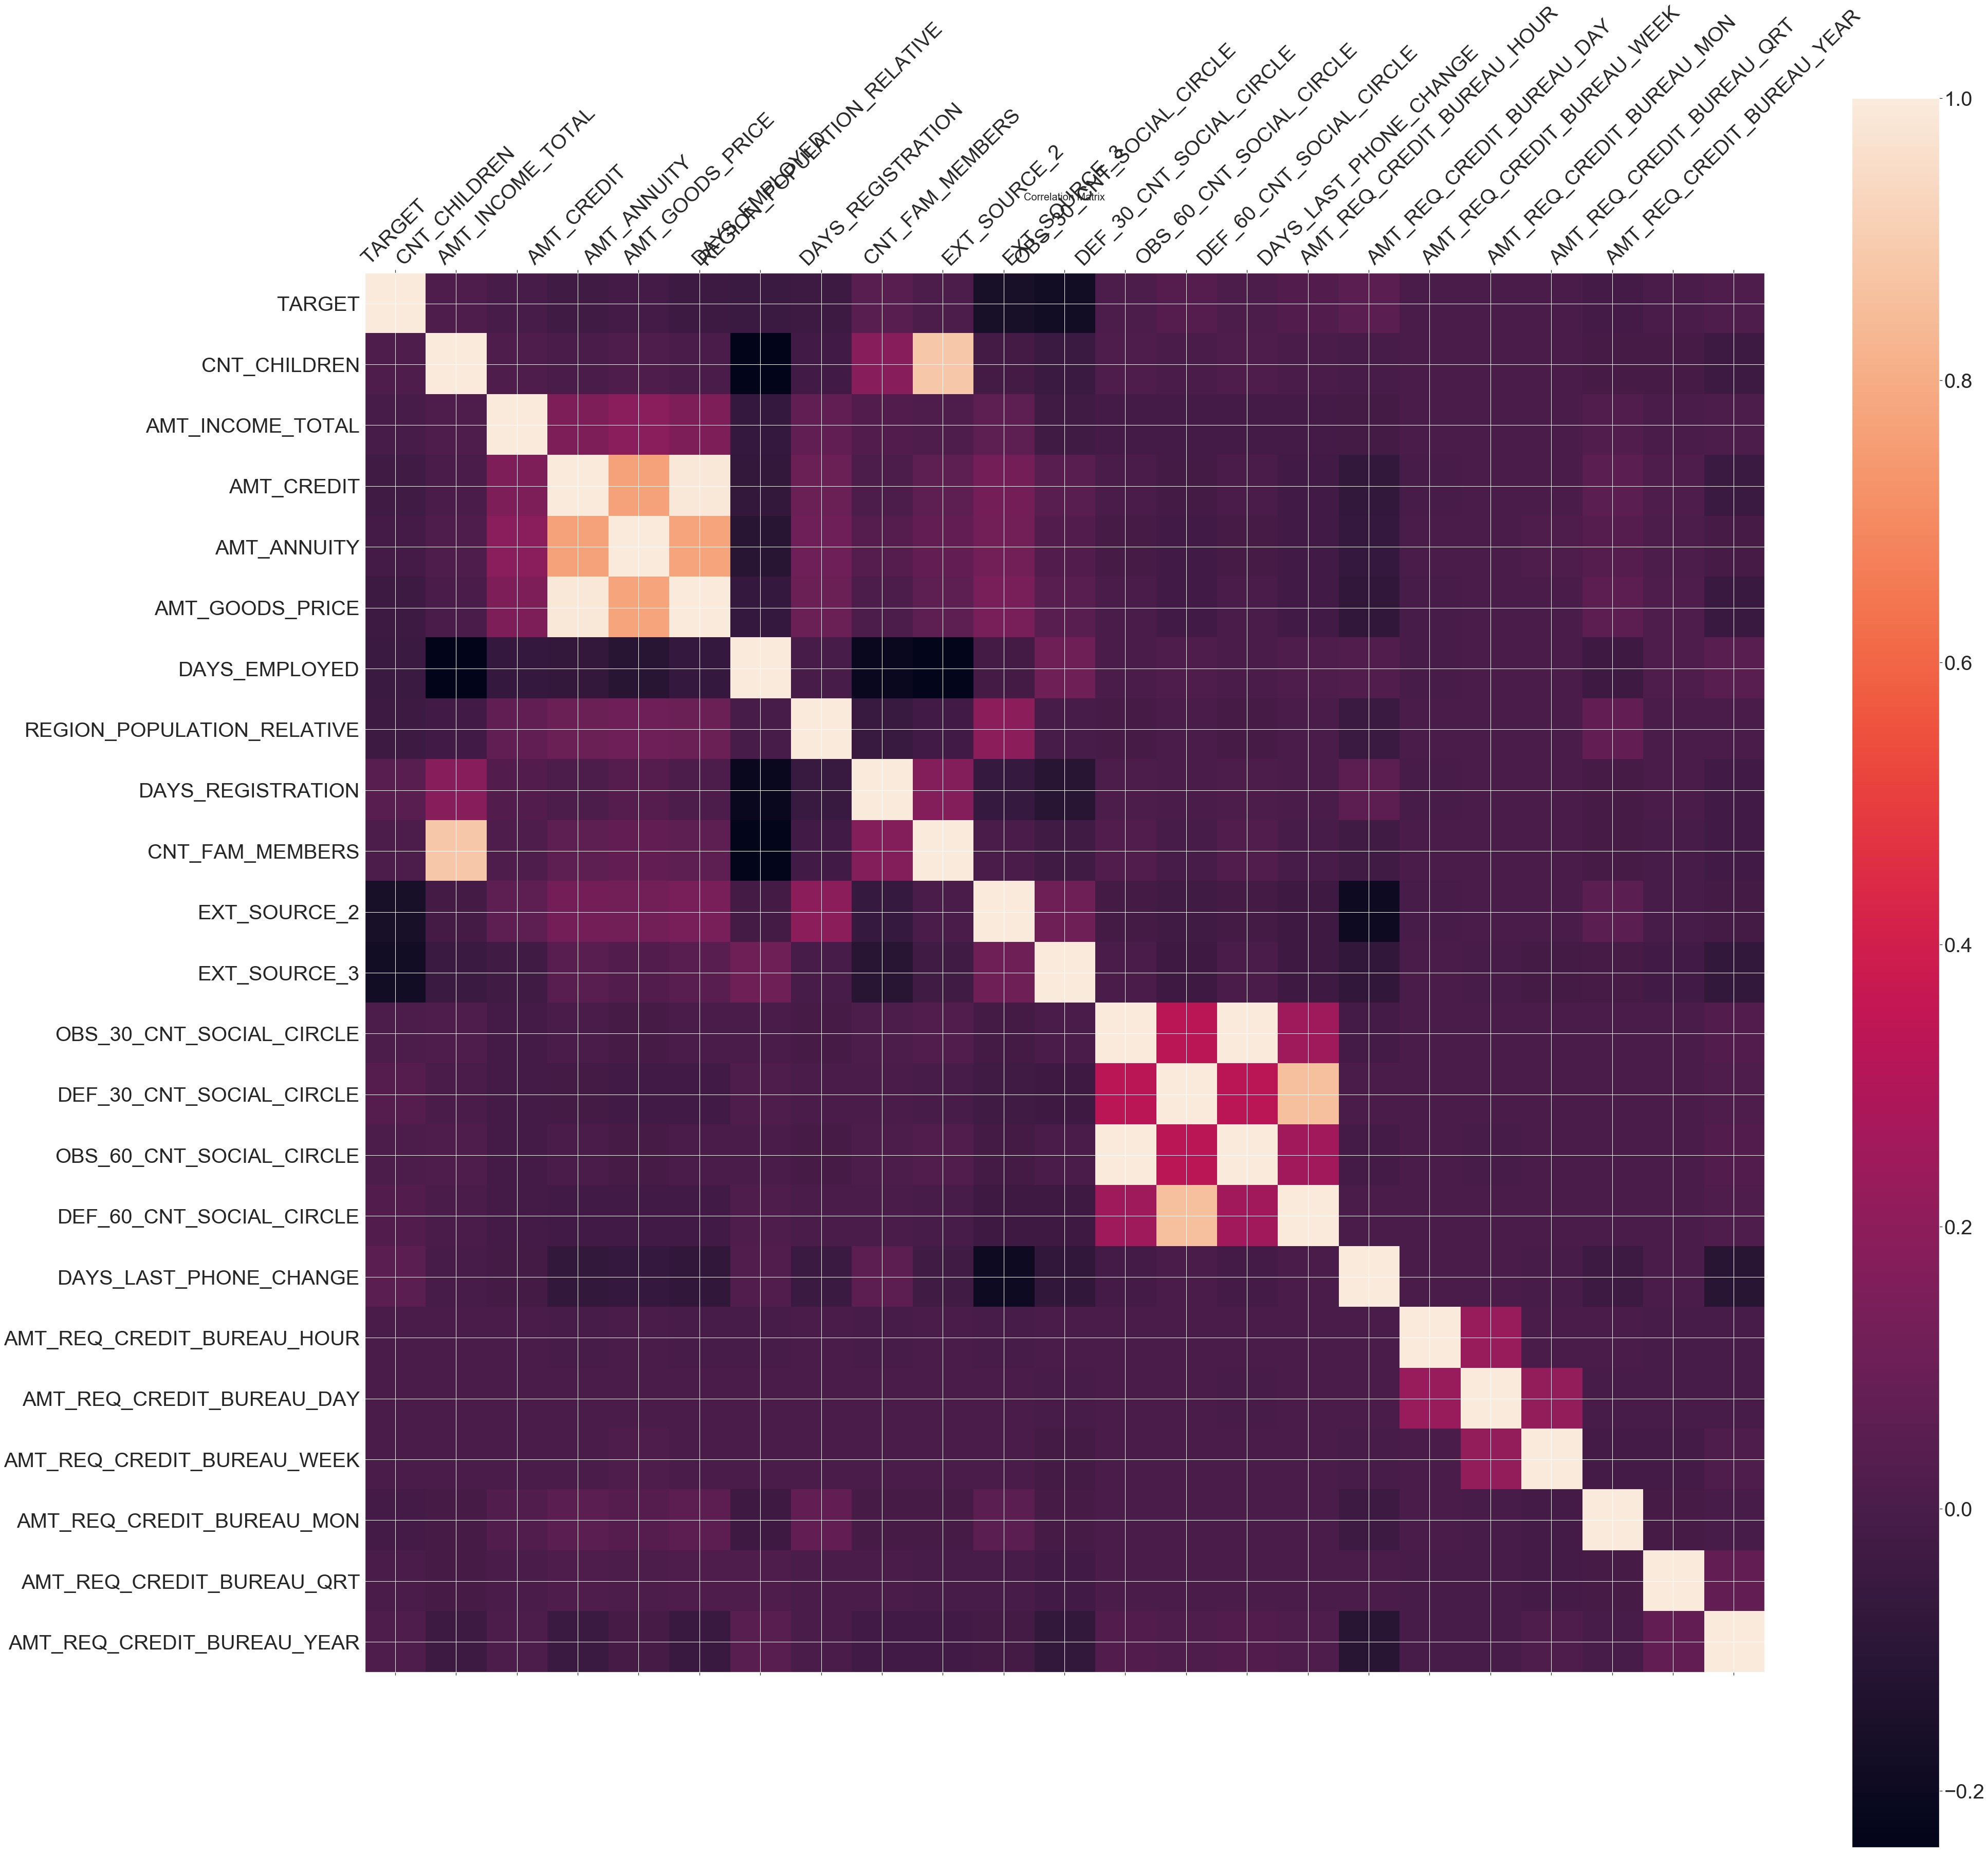

In [59]:
f = plt.figure(figsize=(61, 61))
plt.matshow(loan_new.corr(), fignum=f.number)
plt.xticks(range(loan_new.shape[1]), loan_new.columns, fontsize=40, rotation=45)
plt.yticks(range(loan_new.shape[1]), loan_new.columns, fontsize=40)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=40)
plt.title('Correlation Matrix', fontsize=20);

# Imbalance Percentage :

In [60]:
#Creating a new dataframe whith TARGET = 1 :
Target_1 = loan[loan['TARGET'] == 1]
Target_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
94          100112       1         Cash loans           M            Y   
110         100130       1         Cash loans           F            N   
138         100160       1         Cash loans           M            N   
154         100181       1         Cash loans           F            N   
163         100192       1         Cash loans           F            N   
180         100209       1    Revolving loans           M            N   
184         100214       1         Cash loans           F            N   
211         100246       1         Cash loans           F            N   
235         100273       1         Cash loans           F            N   
242         100282       1    Revolving loans           F            Y   
246         100286       1         Cash loans           M            Y   
255         100295       1         Cash loans           M            Y   
260         100300       1         Cash loans           M            N   
261         100301       1         Cash loans           M            N   
283         100326       1         Cash loans           M            Y   
291         100336       1         Cash loans           F            Y   
344         100396       1         Cash loans           M            N   
348         100401       1         Cash loans           F            N   
368         100424       1         Cash loans           M            N   
381         100439       1         Cash loans           M            N   
389         100452       1         Cash loans           M            N   
408         100472       1         Cash loans           M            Y   
413         100477       1         Cash loans           M            Y   
419         100485       1    Revolving loans           M            Y   
424         100490       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307123      455819       1         Cash loans           M            Y   
307126      455822       1         Cash loans           M            Y   
307133      455830       1    Revolving loans           F            N   
307162      455865       1         Cash loans           M            N   
307177      455880       1         Cash loans           M            N   
307183      455886       1         Cash loans           F            N   
307248      455964       1         Cash loans           F            N   
307256      455973       1         Cash loans           F            N   
307266      455983       1         Cash loans           M            Y   
307268      455985       1         Cash loans           M            N   
307283      456000       1         Cash loans           M            Y   
307285      456002       1         Cash loans           F            N   
307288      456005       1         Cash loans           F            N   
307310      456034       1         Cash loans           M            N   
307323      456047       1         Cash loans           F            N   
307328      456052       1         Cash loans           M            Y   
307363      456088       1         Cash loans           F            Y   
307377      456102       1         Cash loans           M            N   
307383      456108       1         Cash loans           F            N   
307386      456112       1         Cash loans           F            N   
307407      456140       1         Cash loans           F            Y   
307410      456143       1         Cash loans           F            N   
307433      

In [61]:
#Creating a new dataframe whith TARGET = 0 :
Target_0 = loan[loan['TARGET'] == 0]
Target_0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
16          100020       0         Cash loans           M            N   
17          100021       0    Revolving loans           F            N   
18          100022       0    Revolving loans           F            N   
19          100023       0         Cash loans           F            N   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
22          100026       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
24          100029       0         Cash loans           M            Y   
25          100030       0         Cash loans           F            N   
27          100032       0         Cash loans           M            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
30          100035       0         Cash loans           F            N   
31          100036       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307478      456218       0         Cash loans           F            N   
307479      456219       0         Cash loans           F            N   
307480      456220       0         Cash loans           F            N   
307482      456226       0         Cash loans           F            Y   
307483      456227       0         Cash loans           F            N   
307484      456228       0         Cash loans           F            Y   
307485      456229       0    Revolving loans           F            N   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307488      456232       0         Cash loans           F            N   
307490      456234       0         Cash loans           M            N   
307491      456235       0         Cash loans           M            Y   
307492      456236       0         Cash loans           M            Y   
307493      456237       0         Cash loans           F            N   
307494      456238       0         Cash loans           M            Y   
307495      456239       0         Cash loans           M            Y   
307496      456240       0    Revolving loans           F            N   
307497      456241       0         Cash loans           F            Y   
307498      456242       0         Cash loans           M            Y   
307499      456243       0         Cash loans           F            N   
307500      456244       0         Cash loans           F            N   
307501      456245       0         Cash loans           F            N   
307502      

IMBALANCE PERCENTAGE :

In [62]:
#Total Number of Rows :
count_row = loan.shape[0]
count_row

307341

In [65]:
#Total Number of Rows for Target = 1:
count_row_1 = Target_1.shape[0]
count_row_1

24817

In [66]:
#IMBALANCE PERCENTAGE :
Imb_Per = ((count_row_1/count_row)*100)
Imb_Per

8.074744339349452

# Correlation for Numerical columns for Target = 1 :


In [67]:
loan_corr_1 = Target_1.corr()
loan_corr_1

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.004930   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.004930     NaN      1.000000   
AMT_INCOME_TOTAL              -0.010179     NaN      0.004803   
AMT_CREDIT                    -0.001206     NaN     -0.001693   
AMT_ANNUITY                   -0.007478     NaN      0.031246   
AMT_GOODS_PRICE               -0.001751     NaN     -0.008119   
REGION_POPULATION_RELATIVE     0.006472     NaN     -0.032083   
DAYS_BIRTH                    -0.001016     NaN      0.259032   
DAYS_EMPLOYED                 -0.005313     NaN     -0.191992   
DAYS_REGISTRATION              0.006689     NaN      0.149070   
DAYS_ID_PUBLISH               -0.002436     NaN     -0.032405   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                 0.005410     NaN      0.192520   
FLAG_WORK_PHONE                0.005044     NaN      0.051697   
FLAG_CONT_MOBILE              -0.003045     NaN      0.003594   
FLAG_PHONE                     0.018325     NaN     -0.024330   
FLAG_EMAIL                     0.000863     NaN      0.013894   
CNT_FAM_MEMBERS               -0.003612     NaN      0.885526   
REGION_RATING_CLIENT          -0.005861     NaN      0.040730   
REGION_RATING_CLIENT_W_CITY   -0.004064     NaN      0.043238   
HOUR_APPR_PROCESS_START        0.004987     NaN     -0.023945   
REG_REGION_NOT_LIVE_REGION    -0.004233     NaN     -0.024329   
REG_REGION_NOT_WORK_REGION     0.004153     NaN     -0.020804   
LIVE_REGION_NOT_WORK_REGION    0.004331     NaN     -0.012082   
REG_CITY_NOT_LIVE_CITY         0.008378     NaN     -0.001188   
REG_CITY_NOT_WORK_CITY         0.001001     NaN      0.046037   
LIVE_CITY_NOT_WORK_CITY       -0.002719     NaN      0.053436   
EXT_SOURCE_2                   0.006450     NaN     -0.012251   
EXT_SOURCE_3                  -0.008178     NaN     -0.020268   
...                                 ...     ...           ...   
DEF_30_CNT_SOCIAL_CIRCLE      -0.005549     NaN      0.001448   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009058     NaN      0.025180   
DEF_60_CNT_SOCIAL_CIRCLE      -0.009417     NaN     -0.005089   
DAYS_LAST_PHONE_CHANGE         0.002566     NaN      0.011430   
FLAG_DOCUMENT_2               -0.002290     NaN     -0.007780   
FLAG_DOCUMENT_3               -0.004400     NaN      0.060528   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5                0.002686     NaN     -0.022144   
FLAG_DOCUMENT_6                0.003354     NaN     -0.129502   
FLAG_DOCUMENT_7                0.002344     NaN     -0.001896   
FLAG_DOCUMENT_8                0.003924     NaN      0.028758   
FLAG_DOCUMENT_9               -0.005241     NaN      0.003589   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11              -0.003628     NaN     -0.007552   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13              -0.001681     NaN      0.001662   
FLAG_DOCUMENT_14               0.001332     NaN     -0.002934   
FLAG_DOCUMENT_15               0.007982     NaN      0.004800   
FLAG_DOCUMENT_16              -0.000694     NaN     -0.001082   
FLAG_DOCUMENT_17              -0.005428     NaN     -0.005501   
FLAG_DOCUMENT_18              -0.009173     NaN      0.004330   
FLAG_DOCUMENT_19              -0.006380     NaN     -0.001371   
FLAG_DOCUMENT_20               0.003785     NaN     -0.002396   
FLAG_DOCUMENT_21               0.006936     NaN      0.001135   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.012036     NaN     -0.000382   
AMT_REQ_CREDIT_BUREAU_DAY     -0.007954     NaN     -0.013004   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.002734     NaN     -0.010767   
AMT_REQ_CREDIT_BUREAU_MON      0.006436     NaN     -0.012583   
AMT_REQ_CREDIT_BUREAU_QRT     -0.000880     NaN     -0.018174   
AMT_REQ_CREDIT_BUREAU_YEAR     0.007979     NaN     -0.031843   

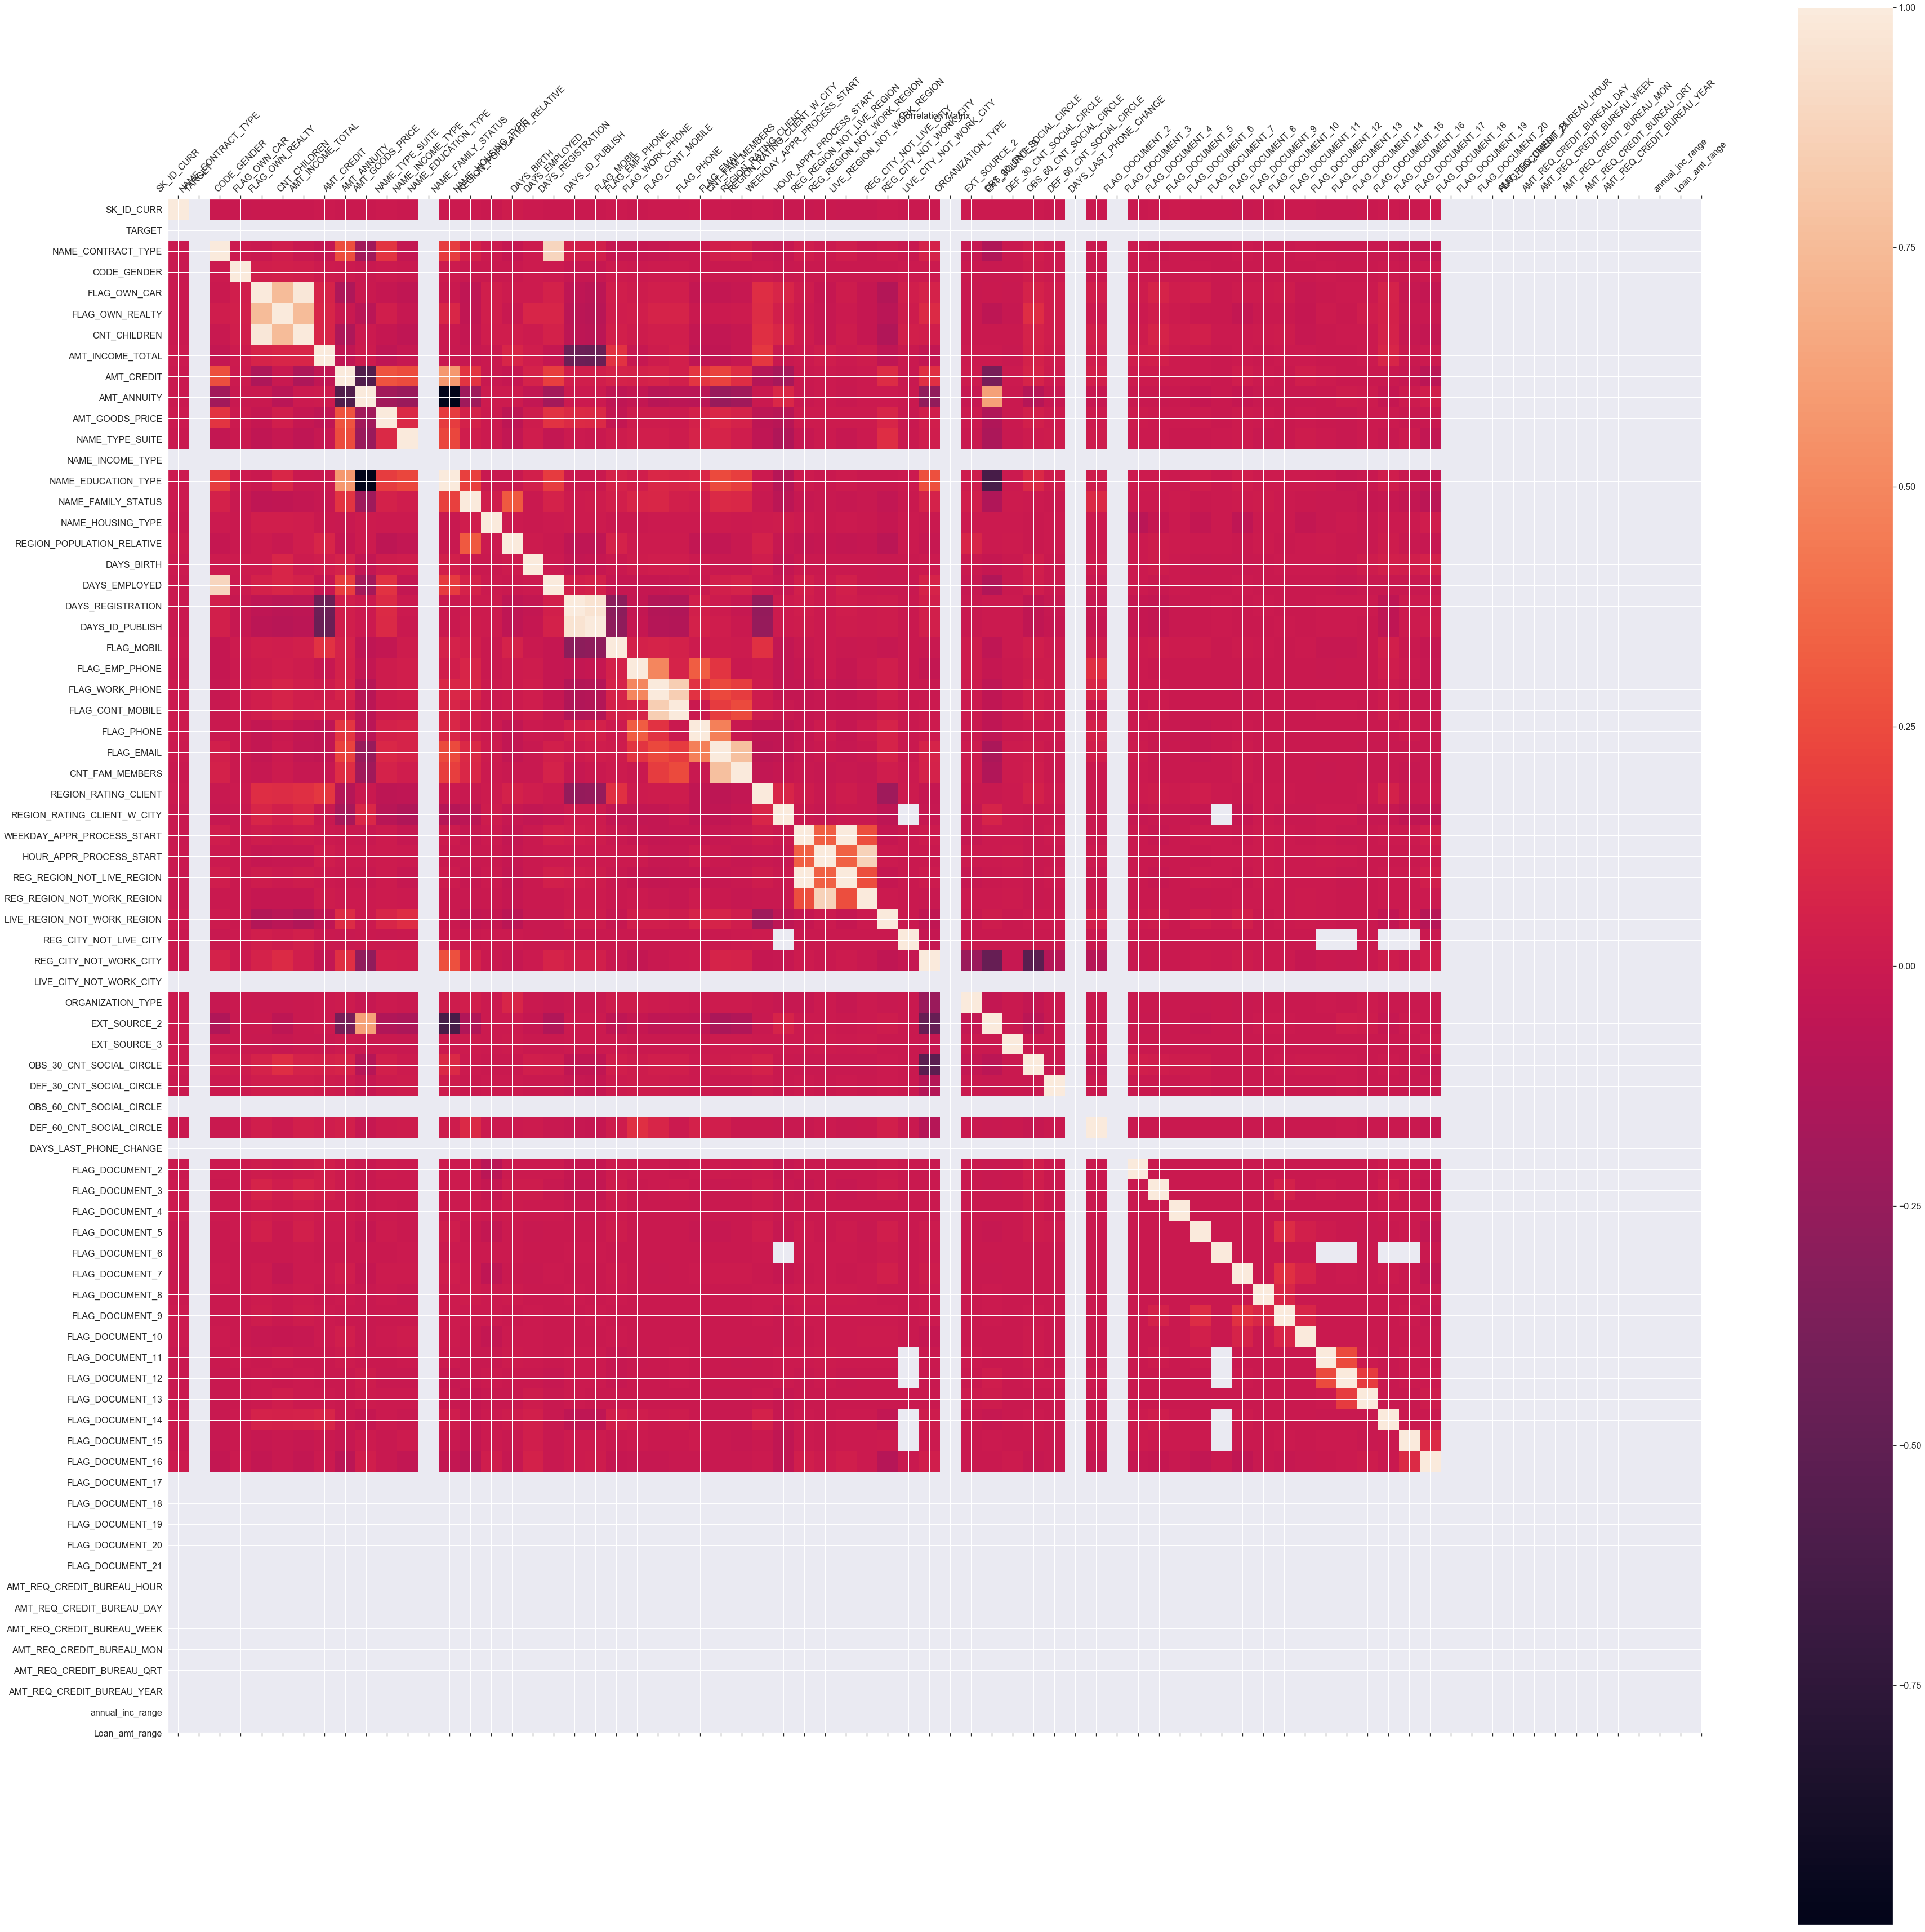

In [68]:
#Heat Map for Target = 1 :
f = plt.figure(figsize=(61, 61))
plt.matshow(Target_1.corr(), fignum=f.number)
plt.xticks(range(Target_1.shape[1]), Target_1.columns, fontsize=16, rotation=45)
plt.yticks(range(Target_1.shape[1]), Target_1.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

# Correlation for Numerical columns for Target = 0 :

In [69]:
loan_corr_0 = Target_0.corr()
loan_corr_0

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.000809   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.000809     NaN      1.000000   
AMT_INCOME_TOTAL               0.001755     NaN      0.027726   
AMT_CREDIT                    -0.000342     NaN      0.003187   
AMT_ANNUITY                    0.000076     NaN      0.021091   
AMT_GOODS_PRICE               -0.000200     NaN     -0.000397   
REGION_POPULATION_RELATIVE     0.000363     NaN     -0.024221   
DAYS_BIRTH                    -0.001353     NaN      0.337093   
DAYS_EMPLOYED                  0.001780     NaN     -0.243349   
DAYS_REGISTRATION             -0.001501     NaN      0.185775   
DAYS_ID_PUBLISH                0.000025     NaN     -0.028775   
FLAG_MOBIL                     0.002926     NaN      0.001081   
FLAG_EMP_PHONE                -0.001754     NaN      0.244267   
FLAG_WORK_PHONE               -0.000874     NaN      0.055418   
FLAG_CONT_MOBILE               0.003234     NaN     -0.001245   
FLAG_PHONE                     0.001337     NaN     -0.029959   
FLAG_EMAIL                     0.000185     NaN      0.023497   
CNT_FAM_MEMBERS               -0.002901     NaN      0.878590   
REGION_RATING_CLIENT          -0.000542     NaN      0.022779   
REGION_RATING_CLIENT_W_CITY   -0.000765     NaN      0.021807   
HOUR_APPR_PROCESS_START       -0.000077     NaN     -0.005198   
REG_REGION_NOT_LIVE_REGION     0.000050     NaN     -0.012281   
REG_REGION_NOT_WORK_REGION     0.000744     NaN      0.010819   
LIVE_REGION_NOT_WORK_REGION    0.002707     NaN      0.017284   
REG_CITY_NOT_LIVE_CITY        -0.002921     NaN      0.021618   
REG_CITY_NOT_WORK_CITY        -0.001720     NaN      0.072154   
LIVE_CITY_NOT_WORK_CITY        0.000415     NaN      0.070941   
EXT_SOURCE_2                   0.001603     NaN     -0.015415   
EXT_SOURCE_3                   0.000309     NaN     -0.041729   
...                                 ...     ...           ...   
DEF_30_CNT_SOCIAL_CIRCLE       0.000556     NaN     -0.002246   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000741     NaN      0.014137   
DEF_60_CNT_SOCIAL_CIRCLE       0.002378     NaN     -0.002169   
DAYS_LAST_PHONE_CHANGE        -0.000970     NaN     -0.008433   
FLAG_DOCUMENT_2                0.001342     NaN      0.003736   
FLAG_DOCUMENT_3               -0.003301     NaN      0.055622   
FLAG_DOCUMENT_4               -0.004323     NaN     -0.003834   
FLAG_DOCUMENT_5               -0.001391     NaN     -0.016280   
FLAG_DOCUMENT_6                0.001961     NaN     -0.159033   
FLAG_DOCUMENT_7               -0.003048     NaN     -0.001444   
FLAG_DOCUMENT_8                0.001607     NaN      0.053901   
FLAG_DOCUMENT_9                0.002005     NaN     -0.002365   
FLAG_DOCUMENT_10              -0.000853     NaN     -0.002860   
FLAG_DOCUMENT_11              -0.001903     NaN     -0.005066   
FLAG_DOCUMENT_12              -0.001092     NaN      0.000322   
FLAG_DOCUMENT_13               0.001004     NaN      0.004335   
FLAG_DOCUMENT_14              -0.001239     NaN     -0.005462   
FLAG_DOCUMENT_15               0.002330     NaN      0.003707   
FLAG_DOCUMENT_16              -0.000757     NaN      0.011767   
FLAG_DOCUMENT_17               0.001776     NaN      0.001158   
FLAG_DOCUMENT_18               0.001191     NaN      0.004173   
FLAG_DOCUMENT_19               0.000675     NaN      0.001076   
FLAG_DOCUMENT_20               0.000832     NaN      0.001300   
FLAG_DOCUMENT_21              -0.000522     NaN     -0.002887   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001879     NaN     -0.000432   
AMT_REQ_CREDIT_BUREAU_DAY     -0.001725     NaN      0.000648   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002353     NaN     -0.001530   
AMT_REQ_CREDIT_BUREAU_MON      0.000054     NaN     -0.010455   
AMT_REQ_CREDIT_BUREAU_QRT      0.001148     NaN     -0.007087   
AMT_REQ_CREDIT_BUREAU_YEAR     0.004056     NaN     -0.039896   

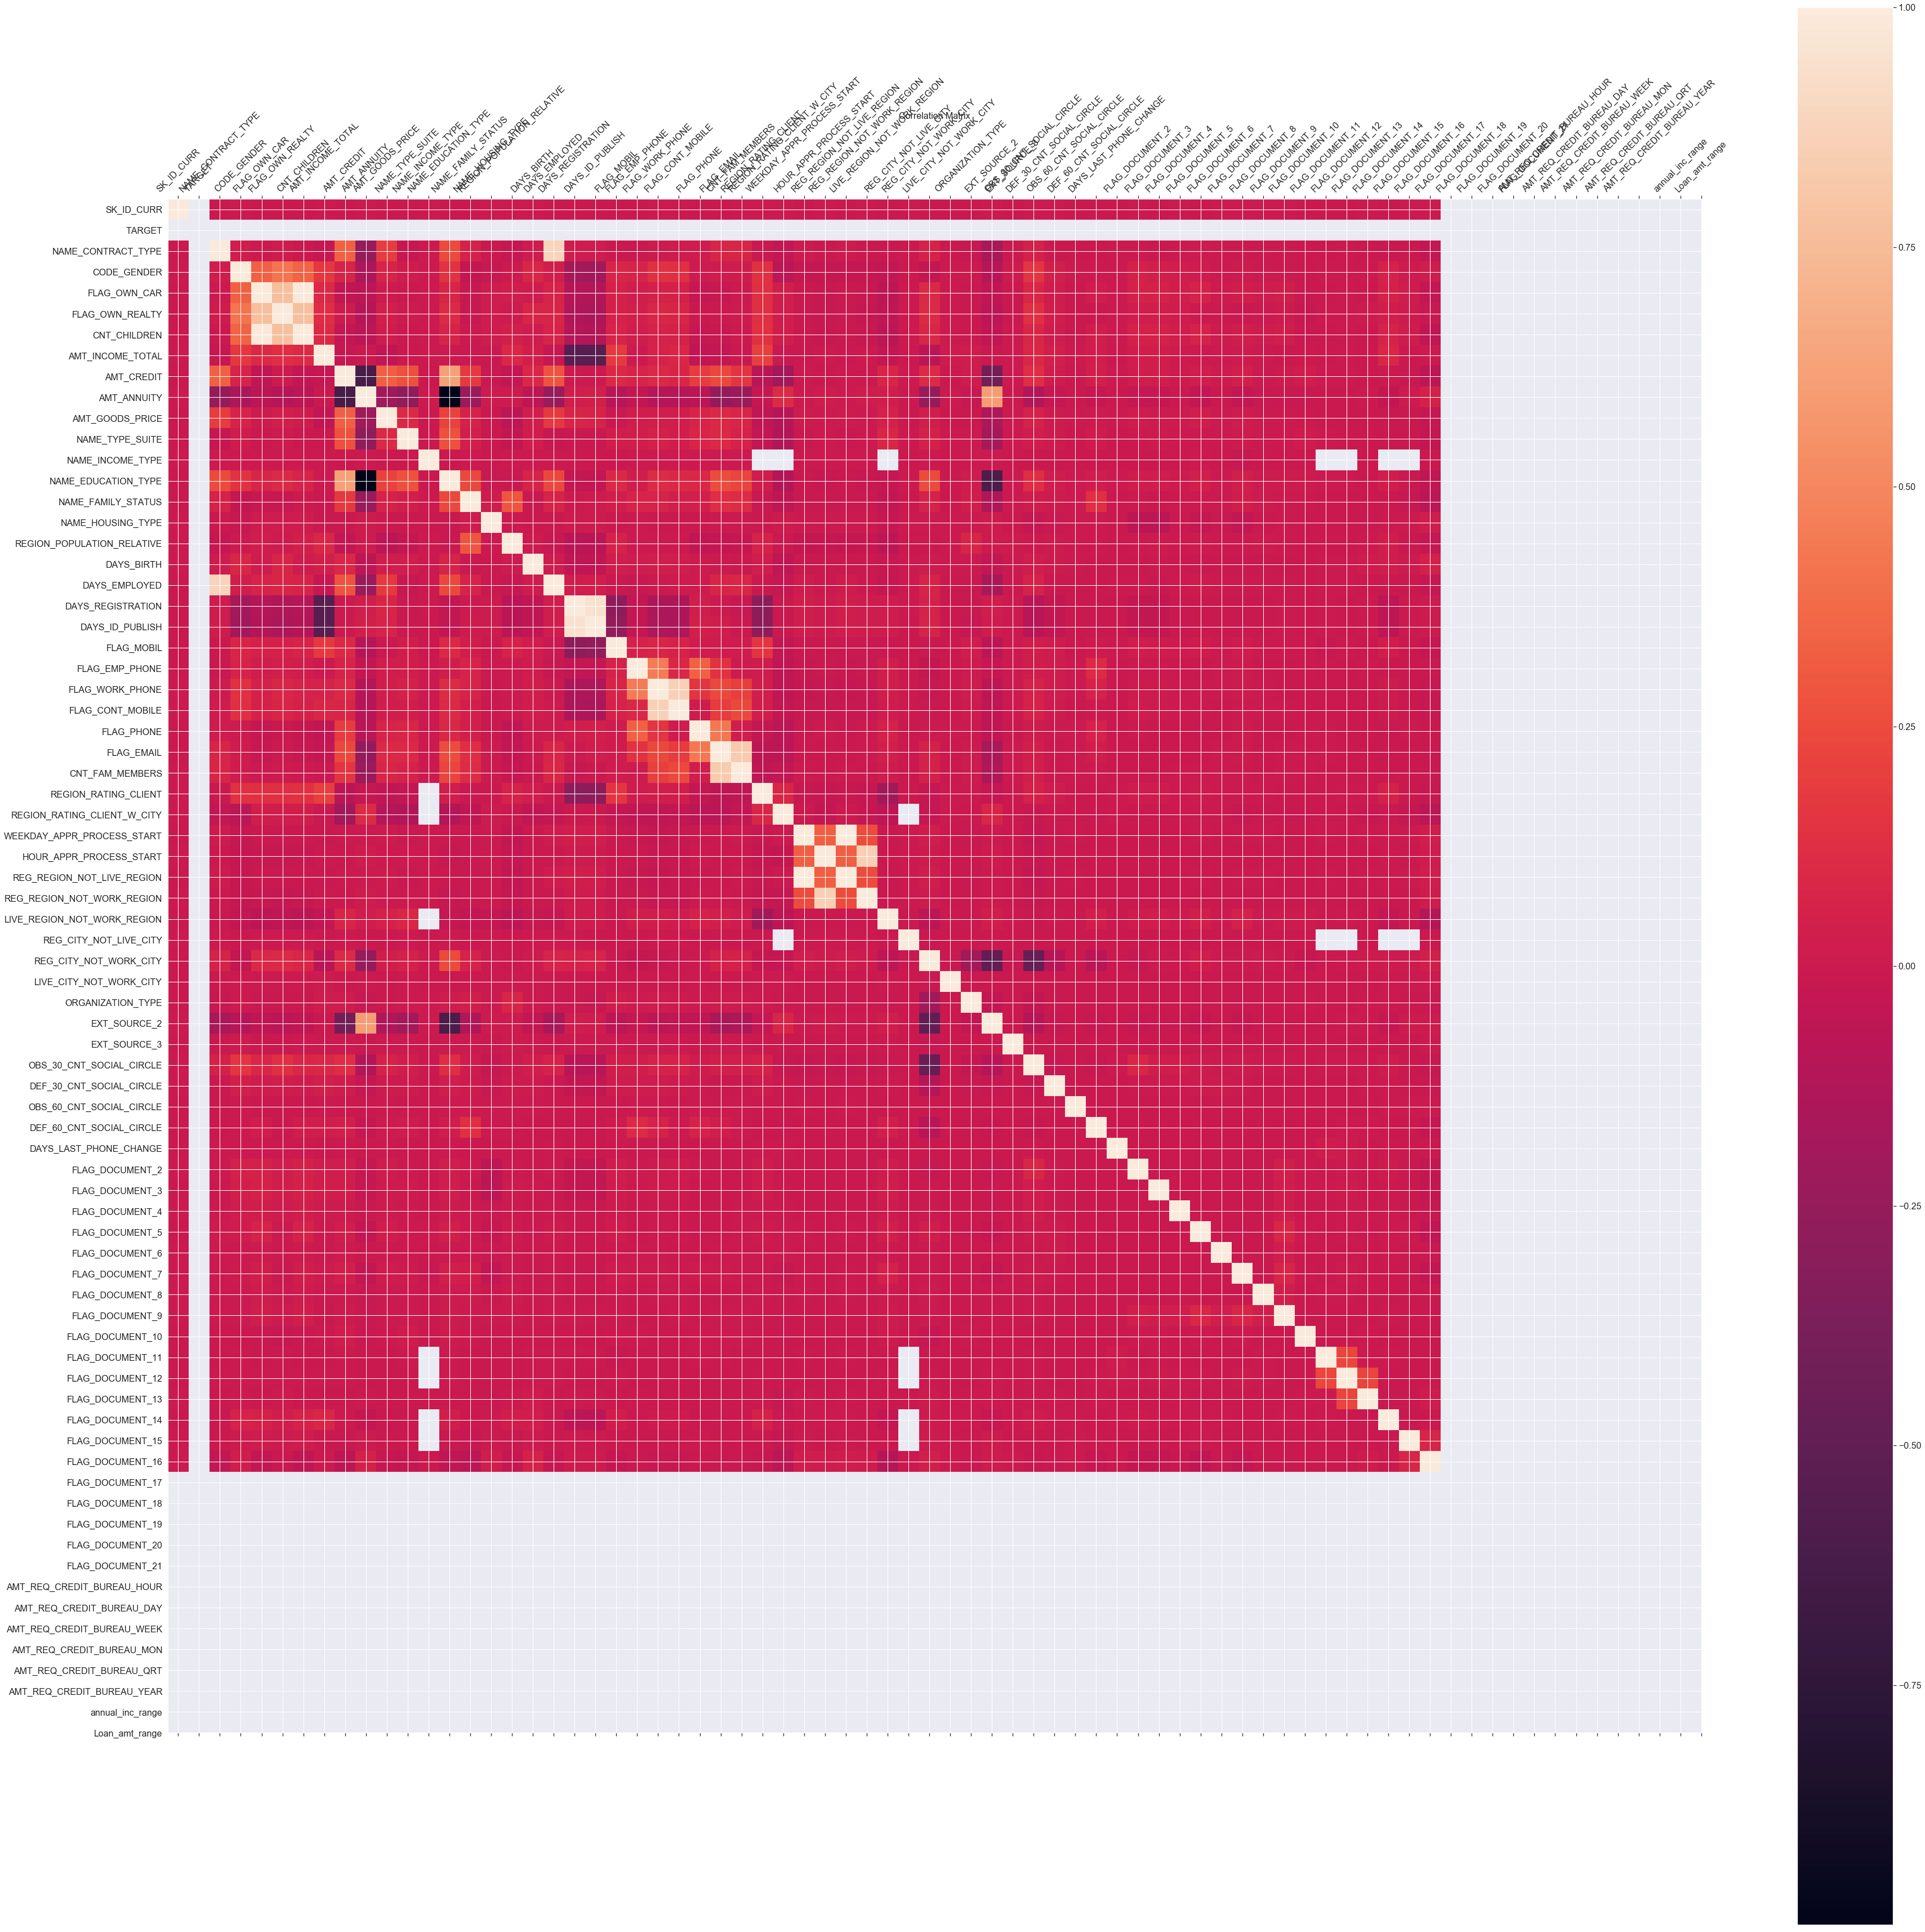

In [70]:
#Heat Map for Target = 0 :
f = plt.figure(figsize=(61, 61))
plt.matshow(Target_0.corr(), fignum=f.number)
plt.xticks(range(Target_0.shape[1]), Target_0.columns, fontsize=16, rotation=45)
plt.yticks(range(Target_0.shape[1]), Target_0.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

# Previous Application :

In [71]:
# Load the previous_application.csv for further analysis `

prev_loan = pd.read_csv('C:/Users/Soumadeep-Chitti/Desktop/DATA SCIENCE/Credit EDA Case Study/previous_application.csv')
#prev_loan = pd.read_csv(r'D:\UpGrad\Statistics Assignment\Credit EDA Assingment\previous_application.csv')
prev_loan.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [72]:
prev_loan.shape

(1670214, 37)

In [73]:
# Data cleaning
# create a new dataframe for previous application with only required columns for analysis
prev_appln = prev_loan[['SK_ID_CURR','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE']].copy()


In [74]:
prev_appln.head()

SK_ID_CURR NAME_CONTRACT_STATUS NAME_CLIENT_TYPE
0      271877             Approved         Repeater
1      108129             Approved         Repeater
2      122040             Approved         Repeater
3      176158             Approved         Repeater
4      202054              Refused         Repeater

In [75]:
# Merging the dataframes
# Note that SK_ID_CURR is the common column/key, which is provided to the 'on' argument
# how = 'inner' makes sure that only the client ids present in both dataframes are included in the result
final_df = pd.merge(loan, prev_appln, how='inner', on='SK_ID_CURR')
final_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100003       0         Cash loans           F            N   
3      100003       0         Cash loans           F            N   
4      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               N             0          270000.0   1293502.5      35698.5   
3               N             0          270000.0   1293502.5      35698.5   
4               Y             0           67500.0    135000.0       6750.0   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  annual_inc_range  \
0                       0.0                        1.0  100000 and above   
1                       0.0                        0.0  100000 and above   
2                       0.0                        0.0  100000 and above   
3                       0.0                        0.0  100000 and above   
4                       0.0                        0.0       50000-75000   

    Loan_amt_range  NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE  
0    100000-500000              Approved               New  
1  1000000-2000000              Approved          Repeater  
2  1000000-2000000              Approved         Refreshed  
3  1000000-2000000              Approved         Refreshed  
4    100000-500000              Approved               New  

[5 rows x 76 columns]

In [76]:
# Check the final count of the data & columns are merged correctly. 
final_df.shape

(1413353, 76)

Analysis to find the following :
- Applicant is likely to repay the loan but still bank refuses thus making buisness loss to the bank
- Applicant is likely to not repay still bank approves the loan thus making financial loss to the bank

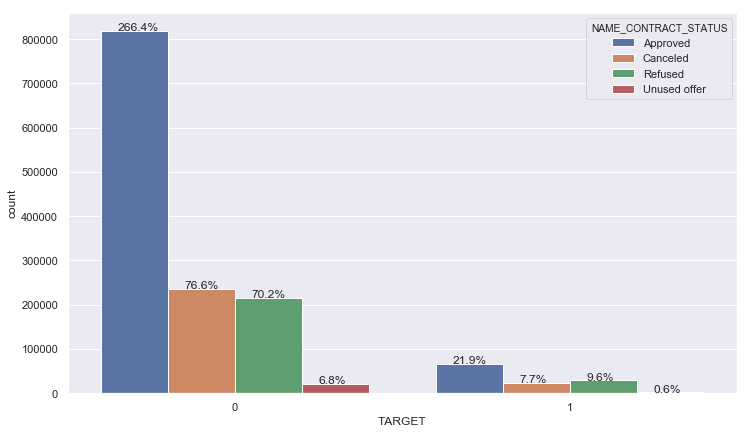

In [77]:
#Univariate analysis on Target and NAME_CONTRACT_STATUS :
univariate(df=final_df,col='TARGET',vartype=1,hue='NAME_CONTRACT_STATUS')
# Based on the data below 70.2% of customers who are not defaulters the loan has been refused by bank. 
# This set of customers needs to be analysed to ensure that bank does'nt go on loss. 
# Similarly 21.9% of the customers has been approved for loan who fall under defaulters i.e target = 1 which indicates that bank will end up in losing money. 

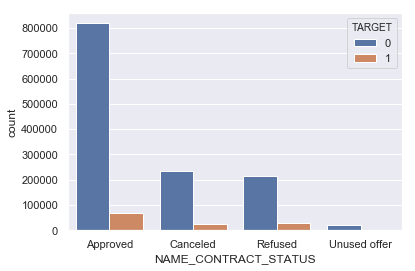

In [78]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "TARGET", data = final_df)


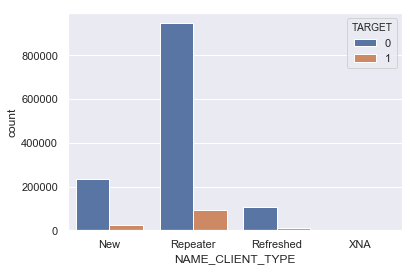

In [79]:
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "TARGET", data = final_df)

In [80]:
Housing_table = pd.crosstab(index=final_df["NAME_CONTRACT_STATUS"], 
                          columns=final_df["NAME_HOUSING_TYPE"])

Housing_table

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791500                33124   
Canceled                          629             234050                 9142   
Refused                           659             219255                 8541   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7318             12596         38569  
Canceled                          1926              3380         10232  
Refused                           2005              3502         11366  
Unused offer                       178               278          1436

# Predicting the probable defaulters:

In [81]:
#Creating a new dataframe whith TARGET = 1 :
Target_1_final = final_df[final_df['TARGET'] == 1]
Target_1_final 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0            100002       1         Cash loans           M            N   
161          100047       1         Cash loans           M            N   
162          100047       1         Cash loans           M            N   
163          100047       1         Cash loans           M            N   
164          100047       1         Cash loans           M            N   
165          100047       1         Cash loans           M            N   
166          100047       1         Cash loans           M            N   
171          100049       1         Cash loans           F            N   
172          100049       1         Cash loans           F            N   
173          100049       1         Cash loans           F            N   
174          100049       1         Cash loans           F            N   
175          100049       1         Cash loans           F            N   
449          100112       1         Cash loans           M            Y   
450          100112       1         Cash loans           M            Y   
451          100112       1         Cash loans           M            Y   
452          100112       1         Cash loans           M            Y   
516          100130       1         Cash loans           F            N   
517          100130       1         Cash loans           F            N   
638          100160       1         Cash loans           M            N   
639          100160       1         Cash loans           M            N   
640          100160       1         Cash loans           M            N   
706          100181       1         Cash loans           F            N   
707          100181       1         Cash loans           F            N   
708          100181       1         Cash loans           F            N   
709          100181       1         Cash loans           F            N   
710          100181       1         Cash loans           F            N   
711          100181       1         Cash loans           F            N   
712          100181       1         Cash loans           F            N   
713          100181       1         Cash loans           F            N   
714          100181       1         Cash loans           F            N   
...             ...     ...                ...         ...          ...   
1413043      456184       1         Cash loans           M            N   
1413044      456184       1         Cash loans           M            N   
1413045      456184       1         Cash loans           M            N   
1413046      456184       1         Cash loans           M            N   
1413053      456186       1         Cash loans           M            N   
1413054      456186       1         Cash loans           M            N   
1413055      456186       1         Cash loans           M            N   
1413056      456186       1         Cash loans           M            N   
1413057      456186       1         Cash loans           M            N   
1413058      456186       1         Cash loans           M            N   
1413171      456215       1         Cash loans           F            N   
1413172      456215       1         Cash loans           F            N   
1413173      456215       1         Cash loans           F            N   
1413174      456215       1         Cash loans           F            N   
1413175      456215       1         Cash loans           F            N   
1413176      456215       1         Cash loans           F            N   
1413177      456215       1         Cash loans           F            N   
1413178      456215       1         Cash loans           F            N   
1413179      456215       1         Cash loans           F            N   
1413180      456215       1         Cash loans           F            N   
1413181      456215       1         Cash loans           F            N   
1413207      456225       1       

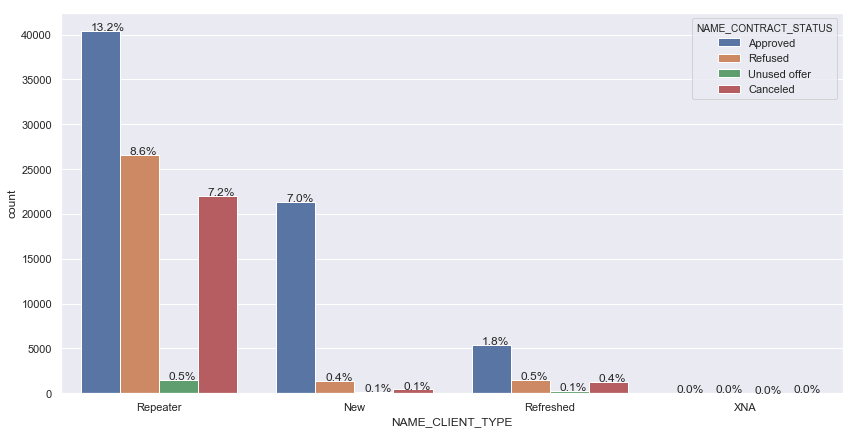

In [82]:
univariate(df=Target_1_final,col='NAME_CLIENT_TYPE',vartype=1,hue='NAME_CONTRACT_STATUS')

In [83]:
defaulter = Target_1_final[Target_1_final['NAME_CONTRACT_STATUS'] == 'Refused']

In [84]:
defaulter_final = defaulter[defaulter['NAME_CLIENT_TYPE'] == 'Repeater']
defaulter_final

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
163          100047       1         Cash loans           M            N   
166          100047       1         Cash loans           M            N   
711          100181       1         Cash loans           F            N   
1005         100246       1         Cash loans           F            N   
1115         100273       1         Cash loans           F            N   
1117         100273       1         Cash loans           F            N   
1119         100273       1         Cash loans           F            N   
1120         100273       1         Cash loans           F            N   
1235         100301       1         Cash loans           M            N   
1236         100301       1         Cash loans           M            N   
1237         100301       1         Cash loans           M            N   
1238         100301       1         Cash loans           M            N   
1239         100301       1         Cash loans           M            N   
1845         100452       1         Cash loans           M            N   
1923         100477       1         Cash loans           M            Y   
1966         100485       1    Revolving loans           M            Y   
1968         100485       1    Revolving loans           M            Y   
1970         100485       1    Revolving loans           M            Y   
2272         100540       1         Cash loans           F            N   
2294         100547       1         Cash loans           M            Y   
2295         100547       1         Cash loans           M            Y   
2296         100547       1         Cash loans           M            Y   
2299         100547       1         Cash loans           M            Y   
2300         100547       1         Cash loans           M            Y   
2302         100547       1         Cash loans           M            Y   
2305         100547       1         Cash loans           M            Y   
2306         100547       1         Cash loans           M            Y   
2567         100616       1         Cash loans           M            Y   
2633         100636       1         Cash loans           F            N   
2988         100717       1         Cash loans           M            N   
...             ...     ...                ...         ...          ...   
1411629      455865       1         Cash loans           M            N   
1412050      455964       1         Cash loans           F            N   
1412052      455964       1         Cash loans           F            N   
1412108      455973       1         Cash loans           F            N   
1412110      455973       1         Cash loans           F            N   
1412111      455973       1         Cash loans           F            N   
1412112      455973       1         Cash loans           F            N   
1412113      455973       1         Cash loans           F            N   
1412147      455983       1         Cash loans           M            Y   
1412156      455985       1         Cash loans           M            N   
1412234      456002       1         Cash loans           F            N   
1412369      456034       1         Cash loans           M            N   
1412581      456088       1         Cash loans           F            Y   
1412585      456088       1         Cash loans           F            Y   
1412693      456112       1         Cash loans           F            N   
1412694      456112       1         Cash loans           F            N   
1412695      456112       1         Cash loans           F            N   
1412696      456112       1         Cash loans           F            N   
1412697      456112       1         Cash loans           F            N   
1412698      456112       1         Cash loans           F            N   
1412700      456112       1         Cash loans           F            N   
1412709      456112       1       

The SK_ID_CURR for all the probable defaulters are :

In [85]:
defaulter_list = defaulter_final['SK_ID_CURR']
defaulter_list

163        100047
166        100047
711        100181
1005       100246
1115       100273
1117       100273
1119       100273
1120       100273
1235       100301
1236       100301
1237       100301
1238       100301
1239       100301
1845       100452
1923       100477
1966       100485
1968       100485
1970       100485
2272       100540
2294       100547
2295       100547
2296       100547
2299       100547
2300       100547
2302       100547
2305       100547
2306       100547
2567       100616
2633       100636
2988       100717
            ...  
1411629    455865
1412050    455964
1412052    455964
1412108    455973
1412110    455973
1412111    455973
1412112    455973
1412113    455973
1412147    455983
1412156    455985
1412234    456002
1412369    456034
1412581    456088
1412585    456088
1412693    456112
1412694    456112
1412695    456112
1412696    456112
1412697    456112
1412698    456112
1412700    456112
1412709    456112
1412999    456171
1413000    456171
1413002   

In [86]:
comp_defaulter_list = pd.merge(final_df, defaulter_list, how='inner', on='SK_ID_CURR')
comp_defaulter_list.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100047       1         Cash loans           M            N   
1      100047       1         Cash loans           M            N   
2      100047       1         Cash loans           M            N   
3      100047       1         Cash loans           M            N   
4      100047       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0   1193580.0      35028.0   
1               Y             0          202500.0   1193580.0      35028.0   
2               Y             0          202500.0   1193580.0      35028.0   
3               Y             0          202500.0   1193580.0      35028.0   
4               Y             0          202500.0   1193580.0      35028.0   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       2.0   
1                        0.0                       2.0   
2                        0.0                       2.0   
3                        0.0                       2.0   
4                        0.0                       2.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  annual_inc_range  \
0                       0.0                        4.0  100000 and above   
1                       0.0                        4.0  100000 and above   
2                       0.0                        4.0  100000 and above   
3                       0.0                        4.0  100000 and above   
4                       0.0                        4.0  100000 and above   

    Loan_amt_range  NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE  
0  1000000-2000000              Approved          Repeater  
1  1000000-2000000              Approved          Repeater  
2  1000000-2000000              Approved         Refreshed  
3  1000000-2000000              Approved         Refreshed  
4  1000000-2000000               Refused          Repeater  

[5 rows x 76 columns]

In [88]:
defaulters_corr = comp_defaulter_list.corr()
defaulters_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.015879   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.015879     NaN      1.000000   
AMT_INCOME_TOTAL              -0.017369     NaN     -0.042788   
AMT_CREDIT                     0.024306     NaN     -0.026815   
AMT_ANNUITY                   -0.002048     NaN      0.014631   
AMT_GOODS_PRICE                0.026154     NaN     -0.035576   
REGION_POPULATION_RELATIVE    -0.028908     NaN     -0.004294   
DAYS_BIRTH                     0.005312     NaN      0.322212   
DAYS_EMPLOYED                 -0.025473     NaN     -0.199996   
DAYS_REGISTRATION              0.038273     NaN      0.173539   
DAYS_ID_PUBLISH                0.009879     NaN      0.027368   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                 0.025657     NaN      0.201261   
FLAG_WORK_PHONE                0.050942     NaN      0.010420   
FLAG_CONT_MOBILE               0.003375     NaN     -0.001216   
FLAG_PHONE                     0.016076     NaN     -0.070440   
FLAG_EMAIL                     0.003268     NaN      0.050438   
CNT_FAM_MEMBERS               -0.004990     NaN      0.885930   
REGION_RATING_CLIENT          -0.046617     NaN      0.047068   
REGION_RATING_CLIENT_W_CITY   -0.051173     NaN      0.051900   
HOUR_APPR_PROCESS_START        0.000341     NaN      0.018515   
REG_REGION_NOT_LIVE_REGION     0.010947     NaN     -0.012394   
REG_REGION_NOT_WORK_REGION     0.012735     NaN     -0.031938   
LIVE_REGION_NOT_WORK_REGION    0.006990     NaN     -0.033504   
REG_CITY_NOT_LIVE_CITY        -0.019010     NaN     -0.002056   
REG_CITY_NOT_WORK_CITY        -0.036818     NaN      0.063808   
LIVE_CITY_NOT_WORK_CITY       -0.036303     NaN      0.069345   
EXT_SOURCE_2                  -0.004414     NaN     -0.025784   
EXT_SOURCE_3                   0.012365     NaN     -0.039139   
...                                 ...     ...           ...   
DEF_30_CNT_SOCIAL_CIRCLE       0.033025     NaN      0.024624   
OBS_60_CNT_SOCIAL_CIRCLE       0.034891     NaN      0.016755   
DEF_60_CNT_SOCIAL_CIRCLE      -0.011849     NaN      0.041099   
DAYS_LAST_PHONE_CHANGE        -0.044340     NaN      0.030305   
FLAG_DOCUMENT_2               -0.005637     NaN     -0.013129   
FLAG_DOCUMENT_3               -0.029733     NaN      0.067632   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5               -0.003559     NaN     -0.031310   
FLAG_DOCUMENT_6                0.014834     NaN     -0.132516   
FLAG_DOCUMENT_7                0.005234     NaN     -0.006080   
FLAG_DOCUMENT_8                0.023490     NaN      0.052076   
FLAG_DOCUMENT_9               -0.008082     NaN      0.003973   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11              -0.008103     NaN     -0.005323   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13               0.024334     NaN     -0.019074   
FLAG_DOCUMENT_14              -0.020451     NaN     -0.013491   
FLAG_DOCUMENT_15               0.008308     NaN     -0.010137   
FLAG_DOCUMENT_16              -0.015092     NaN      0.037168   
FLAG_DOCUMENT_17                    NaN     NaN           NaN   
FLAG_DOCUMENT_18              -0.029957     NaN      0.001120   
FLAG_DOCUMENT_19              -0.005299     NaN     -0.001865   
FLAG_DOCUMENT_20              -0.004701     NaN     -0.000365   
FLAG_DOCUMENT_21               0.000707     NaN      0.011263   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.000414     NaN      0.018583   
AMT_REQ_CREDIT_BUREAU_DAY      0.014578     NaN     -0.030631   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.015843     NaN      0.027015   
AMT_REQ_CREDIT_BUREAU_MON      0.018185     NaN     -0.010012   
AMT_REQ_CREDIT_BUREAU_QRT      0.016141     NaN     -0.018482   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.022994     NaN     -0.080864   

In [89]:
defaulters_corr = defaulters_corr[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_FAM_MEMBERS','EXT_SOURCE_2']].copy()
defaulters_corr

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                      NaN     -0.015879         -0.017369   
TARGET                          NaN           NaN               NaN   
CNT_CHILDREN                    NaN      1.000000         -0.042788   
AMT_INCOME_TOTAL                NaN     -0.042788          1.000000   
AMT_CREDIT                      NaN     -0.026815          0.318808   
AMT_ANNUITY                     NaN      0.014631          0.401384   
AMT_GOODS_PRICE                 NaN     -0.035576          0.315604   
REGION_POPULATION_RELATIVE      NaN     -0.004294          0.132878   
DAYS_BIRTH                      NaN      0.322212         -0.010561   
DAYS_EMPLOYED                   NaN     -0.199996         -0.107478   
DAYS_REGISTRATION               NaN      0.173539          0.018289   
DAYS_ID_PUBLISH                 NaN      0.027368         -0.025144   
FLAG_MOBIL                      NaN           NaN               NaN   
FLAG_EMP_PHONE                  NaN      0.201261          0.107382   
FLAG_WORK_PHONE                 NaN      0.010420         -0.041615   
FLAG_CONT_MOBILE                NaN     -0.001216          0.005950   
FLAG_PHONE                      NaN     -0.070440          0.003106   
FLAG_EMAIL                      NaN      0.050438          0.114803   
CNT_FAM_MEMBERS                 NaN      0.885930         -0.063304   
REGION_RATING_CLIENT            NaN      0.047068         -0.172836   
REGION_RATING_CLIENT_W_CITY     NaN      0.051900         -0.191799   
HOUR_APPR_PROCESS_START         NaN      0.018515          0.063007   
REG_REGION_NOT_LIVE_REGION      NaN     -0.012394          0.062680   
REG_REGION_NOT_WORK_REGION      NaN     -0.031938          0.131625   
LIVE_REGION_NOT_WORK_REGION     NaN     -0.033504          0.119759   
REG_CITY_NOT_LIVE_CITY          NaN     -0.002056          0.012263   
REG_CITY_NOT_WORK_CITY          NaN      0.063808         -0.003232   
LIVE_CITY_NOT_WORK_CITY         NaN      0.069345         -0.008907   
EXT_SOURCE_2                    NaN     -0.025784          0.174305   
EXT_SOURCE_3                    NaN     -0.039139         -0.018702   
...                             ...           ...               ...   
DEF_30_CNT_SOCIAL_CIRCLE        NaN      0.024624          0.002754   
OBS_60_CNT_SOCIAL_CIRCLE        NaN      0.016755          0.003019   
DEF_60_CNT_SOCIAL_CIRCLE        NaN      0.041099          0.030494   
DAYS_LAST_PHONE_CHANGE          NaN      0.030305         -0.083589   
FLAG_DOCUMENT_2                 NaN     -0.013129          0.015948   
FLAG_DOCUMENT_3                 NaN      0.067632         -0.018264   
FLAG_DOCUMENT_4                 NaN           NaN               NaN   
FLAG_DOCUMENT_5                 NaN     -0.031310         -0.026112   
FLAG_DOCUMENT_6                 NaN     -0.132516         -0.068876   
FLAG_DOCUMENT_7                 NaN     -0.006080         -0.009562   
FLAG_DOCUMENT_8                 NaN      0.052076          0.087727   
FLAG_DOCUMENT_9                 NaN      0.003973          0.042157   
FLAG_DOCUMENT_10                NaN           NaN               NaN   
FLAG_DOCUMENT_11                NaN     -0.005323          0.172168   
FLAG_DOCUMENT_12                NaN           NaN               NaN   
FLAG_DOCUMENT_13                NaN     -0.019074          0.030228   
FLAG_DOCUMENT_14                NaN     -0.013491          0.007868   
FLAG_DOCUMENT_15                NaN     -0.010137          0.027105   
FLAG_DOCUMENT_16                NaN      0.037168          0.024480   
FLAG_DOCUMENT_17                NaN           NaN               NaN   
FLAG_DOCUMENT_18                NaN      0.001120          0.026442   
FLAG_DOCUMENT_19                NaN     -0.001865         -0.003780   
FLAG_DOCUMENT_20                NaN     -0.000365          0.017269   
FLAG_DOCUMENT_21                NaN      0.011263         -0.007363   
AMT_REQ_CREDIT_BUREAU_HOUR      NaN      0.018583    

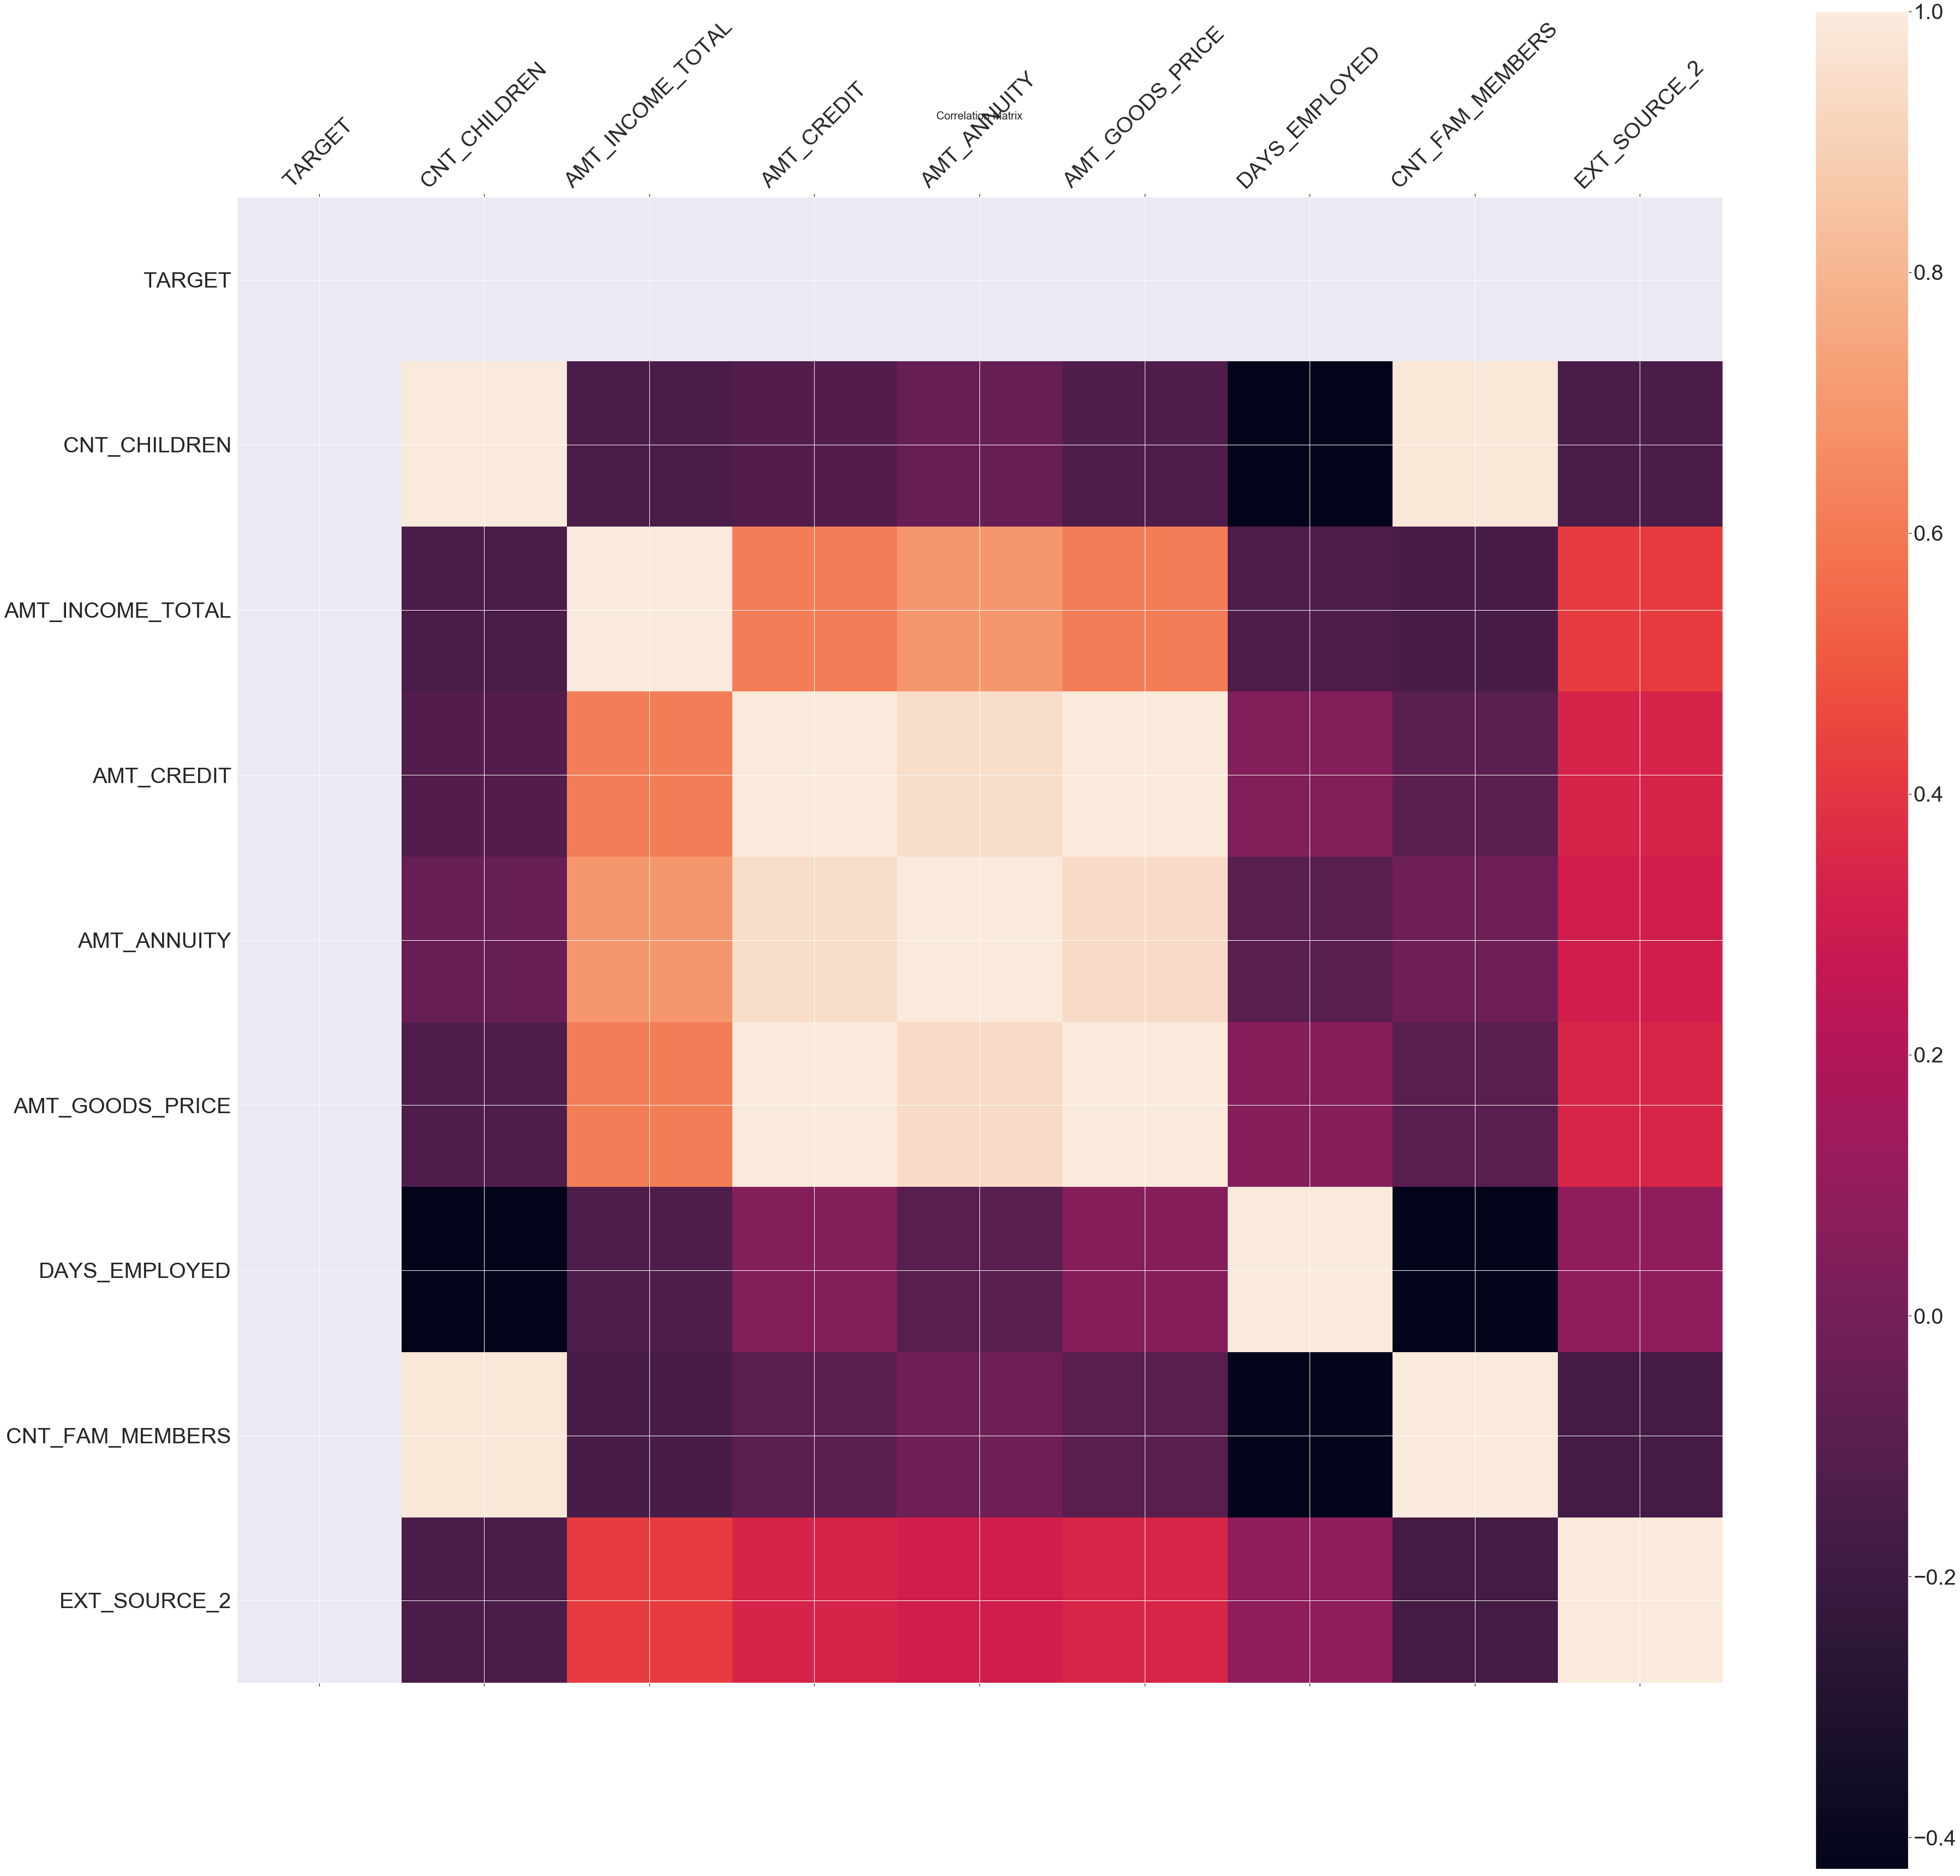

In [90]:
f = plt.figure(figsize=(61, 61))
plt.matshow(defaulters_corr.corr(), fignum=f.number)
plt.xticks(range(defaulters_corr.shape[1]), defaulters_corr.columns, fontsize=40, rotation=45)
plt.yticks(range(defaulters_corr.shape[1]), defaulters_corr.columns, fontsize=40)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=40)
plt.title('Correlation Matrix', fontsize=20);